In [81]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import string
import PyPDF2 # import PDF for example in experiment 3
from tqdm.notebook import tqdm # real time progress tab
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# The String Matching Problem
------------------------------

<br><br><br>


<b>String Matching Problem aka String Searching Problem</b>

<b>Definition</b>: The technique of finding all occurrences of a pattern within a larger text. 

<b>Formal Definition </b>: 
Let 𝑇 be a text over an alphabet Σ.<br> Let 𝑃 be a pattern over Σ such that <br> 𝑙𝑒𝑛𝑔𝑡ℎ(𝑇) = 𝑛, <br> 𝑙𝑒𝑛𝑔𝑡ℎ(𝑃) = 𝑚, <br> and 𝑚 $\le$ 𝑛     (although in practice, n is usually much larger than m)<br> Find all occurrences of 𝑃 in 𝑇

<b>Term - Alphabet Σ </b> : Σ may be a human language alphabet, e.g., the letters A through Z in the English alphabet or the letters א through ת in the Hebrew alphabet, a binary alphabet (Σ = {0,1}), or a DNA alphabet (Σ = {A,C,G,T}) such as in Bioinformatics.

<b>Example</b>:<br>
𝑇 = superca<b>li</b>fragi<b>li</b>sticexpia<b>li</b>docious<br>
𝑃 = li <br>
𝑃 found 3 times in 𝑇



<b>Real World Applications of the String Matching Problem</b>: 
> <b>text-editing</b>: typically the text is a document that is being edited, and the pattern
searched for is a particular word supplied by the user.<br>
<b>DNA mapping</b>: in this case we are interested in finding a particular
pattern in a (long) DNA sequence.<br>
<b>world wide web (www) searching</b>: the text this time is the union of all web-pages in the
internet (...)

## <b>The Naive Approach Using Exact Pattern Matching</b>:

<b>Naive String Search aka Brute Force Approach</b>

<b>Definition</b>: A simple yet inefficient approach to see where the pattern occurs inside a larger text by comparing at each index, one by one. 

<b>Pseudocode:</b>
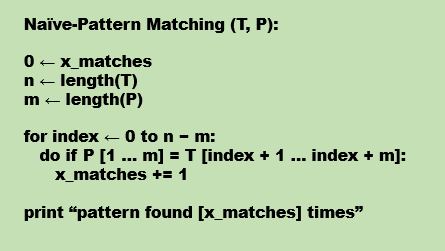
    

<b>Running Time</b>: The worst-case running time is $Θ(nm)$ (i.e., this worst-case occurs when searching for the pattern, 𝑃 = <b>aaaab</b> in the text 𝑇 =<b>aaaaaaaaab</b>). The text that arise in practice lead to a running time $Θ(n+m)$ since we normally only have to look at 1-2 characters for each wrong position to see that it is not a match. Therefore, this naive algorithm is still in widespread use. 

This algorithm is helpful for smaller texts. It does not need any pre-processing phases. It also does not occupy extra space to perform the operation.

<b>Advantages</b>:

- No Pre-processing phase required because the running time of Naive method is equal to its matching time.<br>
-  It is the simplest among the other algorithms and easy to implement. <br>
- No extra space is needed.<br>
- The comparisons can be done in any order. <br>

<b>Disadvantage</b>:

- The naive method is inefficient because information from each subsequent comparison is not used again.

Problem with Naive Algorithm example:
Suppose <b>𝑇= cabababcd</b> and <b>𝑃 =ababc</b>

> The above example shows what makes this approach inefficient (time-consuming) is when it finds the pattern at an index and then does not use it again to find the other index. It again starts from the beginning and starts matching the pattern all over again. So, it doesn’t use information from the previous iteration.





Implemenation of the Naive Algorithm in Python:

In [53]:
def naive(pattern, text):
    occurrences = 0                                # initiate matching pattern count to 0
    for i in range(len(text) - len(pattern) + 1):  # loop over alignments
        match = True
        for j in range(len(pattern)):           # loop over characters
            if text[i+j] != pattern[j]:            # compare characters: if mismatch...
                match = False             # reject alignment
                break                     # goes back to the outer loop and start the next step of looping in the alignment
        if match:                         # if match remained true... 
            occurrences += 1              # all chars matched; count as an exact match 
    return occurrences                    # return total count of pattern matches

In [3]:
text = 'supercalifragilisticexpialidocious'
pattern = 'li'
result = naive(pattern,text)

print(f'{result} total matches of the pattern ({pattern}) were found in the text ({text})')

3 total matches of the pattern (li) were found in the text (supercalifragilisticexpialidocious)


<b>Conclusion</b>:The naïve string matching algorithm is the most preferred approach to finding the positions of said patterns in a given text for various reasons such as no pre-processing requirement, no extra space for operation, etc. However, it cannot be used for rather larger texts because of its inefficiency to perform large operations faster.

## <b>The Naive Approach Using Approximate Pattern Matching</b>:

<b> Approximate String Matching aka Fuzzy String Searching</b>

String matching can be further extended from exact string matching (shown previously) to approximate string matching. As the name suggests, approximate string matching (aka fuzzing string searching) is the technique of finding a matching pattern in a string within a certain number of mismatches. Each such place is therefore an approximate match.

<b>Example</b>: One useful application of approximate string matching is to find a pattern that it misspelled. Take one of the most commonly misspelled words, calendar, and say you want to find the word when it is in its misspelled form, calender, in a sentence<br>

> 𝑇 =  My calender fills up quickly<br>
char_mismatch = 1 (up to one character mismatch allowed) <br>
𝑃 = calendar <br>
𝑃 found 1 time in 𝑇
    

In [4]:
# Like the naive algorithm but we break out of the inner loop as soon as our
# mismatch budget exceeds the maximum allowed character mismatches.
def naive_approx(pattern, text, max_mismatch):
    occurrences = 0                                        # initiate total pattern matches count to 0
    for i in range(len(text) - len(pattern) + 1):          # loop over alignments
        num_char_mismatch = 0                              # initiate number of character mismatches count to 0
        for j in range(len(pattern)):                      # loop over characters
            if text[i+j] != pattern[j]:                    # compare characters, if mismatched...
                num_char_mismatch += 1                     # instead of rejecting match, add 1 to mismatch count
                if num_char_mismatch > max_mismatch:       # if there are more mismatched characters than the budget..
                    break                                  # exceeded maximum mismatch allowance, do not count as a match, go back to outer loops and start the next step of looping in the alignment
        if num_char_mismatch <= max_mismatch:              # approximate match/ match remains true
            occurrences += 1                               # count as an approx match
    return occurrences                                     # return total approx matches count

In [5]:
pattern = 'needle'
text = 'needle noodle nargle'

max_mismatch = 0
result = naive_approx(pattern, text, max_mismatch) 
print(f'{result} total matches of the pattern ({pattern}) were found in the text ({text}) when {max_mismatch} character mismatches were allowed')

max_mismatch = 2
result = naive_approx(pattern, text, max_mismatch) 
print(f'{result} total matches of the pattern ({pattern}) were found in the text ({text}) when {max_mismatch} character mismatches were allowed')

max_mismatch = 3
result = naive_approx(pattern, text, max_mismatch) 
print(f'{result} total matches of the pattern ({pattern}) were found in the text ({text}) when {max_mismatch} character mismatches were allowed')

1 total matches of the pattern (needle) were found in the text (needle noodle nargle) when 0 character mismatches were allowed
2 total matches of the pattern (needle) were found in the text (needle noodle nargle) when 2 character mismatches were allowed
3 total matches of the pattern (needle) were found in the text (needle noodle nargle) when 3 character mismatches were allowed


-------------------------


<br><br> 
## <b>Experiments w/ Naive Algorithm</b>:
<br>

**Experiment 1 - &#8593; Size of Text ⇒ &#8593; Search Time**: <br> *What do we expect to happen when increasing the size of the searched text?* Like searching for a needle in a haystack, the larger the haystack [the searched text], the longer it will take for us to find the needle [the pattern]. Thus, we expect a linear search time (iterating over each comparison one-by-one).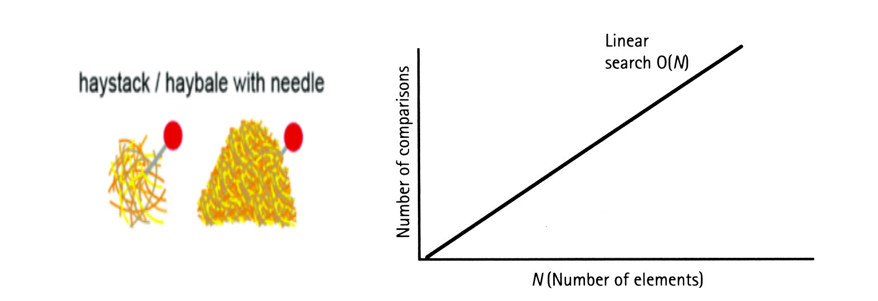<br>




  0%|          | 0/5 [00:00<?, ?it/s]

,time_in_seconds,num_patterns_matching
text_character_length,,
1.e+001,0.029,0
1.e+001,0.029,0
1.e+001,0.029,0
1.e+001,0.029,0
1.e+002,0.030,3
1.e+002,0.030,1
1.e+002,0.030,0
1.e+002,0.030,0
1.e+003,0.031,5


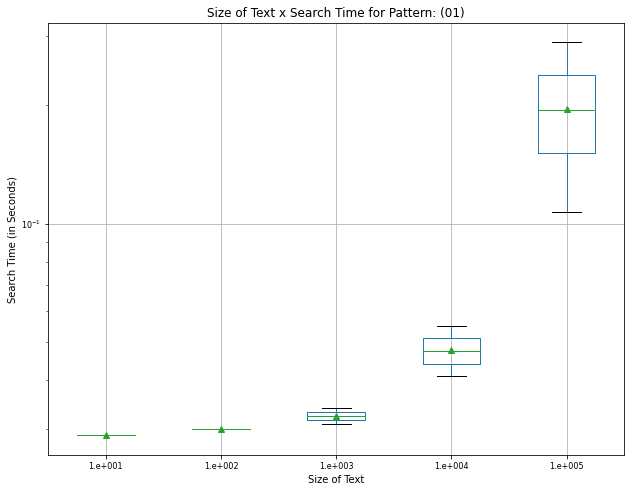

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker

def incr_text_size_bp(pattern, repeats):
    char_len, matches, times = [], [], []
    
    time_before = time.time() #time it
    
    for value in tqdm([10, 100, 1000, 10000, 100000]):
        for repeat in range(repeats):
            random_text = ''.join(random.choices(string.digits, k=value))
            txt = naive(pattern, random_text)
            time_after = time.time()
            matches.append(txt)
            times.append(round(time_after-time_before, 3))
            char_len.append(value) 
            
    char_len_sci = [] #convert x-axis/ length of text to scientific notation
    for c in char_len:
        sci = np.format_float_scientific(c, precision = 1, exp_digits=3)
        char_len_sci.append(sci)
        
        
        
    df = (pd.DataFrame({'time_in_seconds': times, 
                    'num_patterns_matching': matches, 
                    'text_character_length': char_len_sci}).set_index('text_character_length'))
    
    df.boxplot(column='time_in_seconds', by='text_character_length',
                      figsize=(10,8),fontsize=8, showmeans=True, return_type='axes')
    plt.ylabel('Search Time (in Seconds)')
    plt.xlabel('Size of Text')
    plt.title(f'Size of Text x Search Time for Pattern: ({pattern})')
    plt.suptitle('')
    plt.yscale('log')
    return df    ### to visualize full dataframe

########### call the function ##########
tester= incr_text_size_bp('01', 4)
tester




**Average of Repeated Searches : &#8593;Size of Text ⇒  &#8593; Average Search Time  &#8593;SD**: *What do we expect to see when repeating the search multiple times?* We would expect to see more variability in the search time with a larger haystack [text]. A small haystack may take relatively constant time since one can just see the red needle. However, in a very large haystack, the needle could be randomly placed at the top of the haystack or distributed underneath. 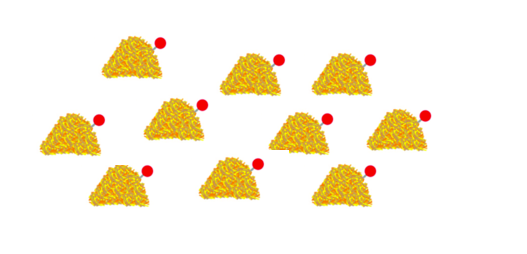 <br> This example returns a boxplot that shows Increasing Text Size = Increasing *Average* Search Time (and standard deviation) in the Naive Exact Algorithm. Box Plots represent averages of running the loop 10 times. .

  0%|          | 0/5 [00:00<?, ?it/s]

,time_in_seconds,num_patterns_matching
text_character_length,,
1.e+003,0.027,6
1.e+003,0.028,10
1.e+003,0.029,8
1.e+003,0.030,13
1.e+003,0.031,9
1.e+003,0.032,12
1.e+003,0.033,7
1.e+003,0.034,12
1.e+003,0.035,8


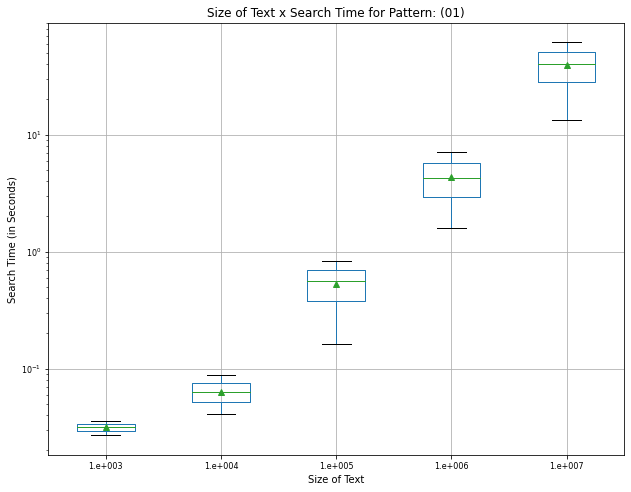

In [7]:
def incr_text_size_bp(pattern, repeats):
    char_len, matches, times = [], [], []
    
    time_before = time.time() #time it
    
    for value in tqdm([1000,10000,100000,1000000,10000000]):
        for repeat in range(repeats):
            random_text = ''.join(random.choices(string.digits, k=value))
            txt = naive(pattern, random_text)
            time_after = time.time()
            matches.append(txt)
            times.append(round(time_after-time_before, 3))
            char_len.append(value) 
            
    char_len_sci = [] #convert x-axis/ length of text to scientific notation
    for c in char_len:
        sci = np.format_float_scientific(c, precision = 1, exp_digits=3)
        char_len_sci.append(sci)
        
        
    
    df = (pd.DataFrame({'time_in_seconds': times, 
                    'num_patterns_matching': matches, 
                    'text_character_length': char_len_sci}).set_index('text_character_length'))

    bxplot= df.boxplot(column='time_in_seconds', by='text_character_length',
                      figsize=(10,8),fontsize=8, showmeans=True, return_type='axes')
    bxplot[0].set_ylabel('Search Time (in Seconds)')
    bxplot[0].set_xlabel('Size of Text')
    bxplot[0].set_title(f'Size of Text x Search Time for Pattern: ({pattern})')
    bxplot[0].set_yscale('log')
    bxplot[0].get_figure().suptitle('')
    
    return df    ### to visualize full dataframe

########### call the function ##########
incr_text_size_bp('01', 10)




**Takeaways of Exp 1: This example returned multiple boxplots, each representing 10 samples on increasing text size N.  The results show that increasing the size of the searched text increases the search time (longer text = longer search time) in the naive exact algorithm. Specifically, it will increase in linear time.** <br><br>



------------------

**Experiment 2 : &#8593; Size of Text ⇒  &#8593; Number of Pattern Matches Found**: *What should we expect to see by increasing the size of the text on the number of pattern matches?* Like using a dating app, we expect to have more matches with a larger radius [text size]. 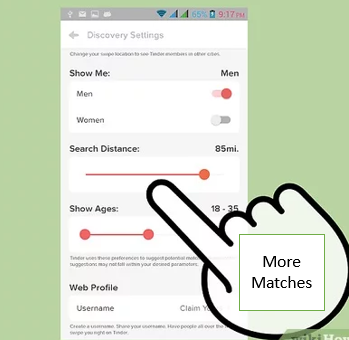 <br>This example returns a boxplot that shows the Number of Matches found when Increasing the Text length in the Naive Exact Algorithm. Box Plots represent averages of running the loop 10 times.  


**Theoretical:** What is the expected # of appearances of our pattern $ {'01'}$ in a text size of length $N$? <br>As each random integer $[0...9]$ has an equal chance of appearing, then the probability of each of the two integers is $\frac{1}{10}$...
Then we expect: $$ N * \frac{1}{10} * \frac{1}{10} = N * \frac{1}{100} $$

|Size of Seacrched Text:|Pattern {01} Expected Value E[X]: |
| :---:        |    :----:   | 
|1000 | 10 times|
|10000 | 100 times|
|100000 | 1000 times |
|1000000 | 10000 times |
|10000000| 100000 times |






  0%|          | 0/4 [00:00<?, ?it/s]

,time_in_seconds,num_patterns_matching,text_character_length
0,0.019,12,1.e+003
1,0.020,9,1.e+003
2,0.020,9,1.e+003
3,0.022,9,1.e+003
4,0.022,16,1.e+003
5,0.023,10,1.e+003
6,0.023,10,1.e+003
7,0.024,4,1.e+003
8,0.025,9,1.e+003
9,0.025,6,1.e+003


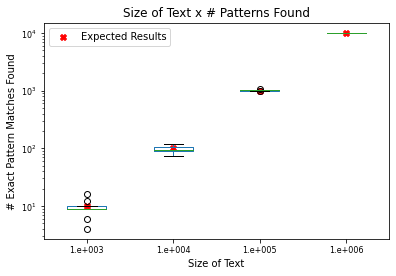

In [8]:
def incr_text_size_bp_pat(pattern, repeats):
    char_len, matches, times = [], [], []
    
    time_before = time.time() #time it
    for value in tqdm([1000,10000,100000,1000000]):
        for repeat in range(repeats):
            random_text = ''.join(random.choices(string.digits, k=value))
            txt = naive(pattern, random_text)
            time_after = time.time()
            matches.append(txt)
            times.append(round(time_after-time_before, 3))
            char_len.append(value)
            
    char_len_sci = [] #convert x-axis/ length of text to scientific notation
    for c in char_len:
        sci = np.format_float_scientific(c, precision = 1, exp_digits=3)
        char_len_sci.append(sci)
    
    df = pd.DataFrame({'time_in_seconds': times, 
                    'num_patterns_matching': matches, 
                    'text_character_length': char_len_sci}) 
    
    # graphs...
    fig, ax = plt.subplots()

    bxplot= df.boxplot(column='num_patterns_matching', by='text_character_length',fontsize=8, return_type='axes',ax=ax)
    
    scatter = plt.scatter(x=range(1,5), y= [10, 100, 1000, 10000], c='red', marker='X', label='Expected Results')
    ax.legend(loc='upper left')
    ax.set_ylabel('# Exact Pattern Matches Found')
    ax.set_xlabel('Size of Text')
    ax.set_title('Size of Text x # Patterns Found')
    ax.get_figure().suptitle('')
    ax.grid()
    ax.set_yscale('log')

    return df
    


    
########### call the function ##########
incr_text_size_bp_pat('01', 10)




**Takeaways of Experiment 2: This example returned multiple boxplots, each representing 10 samples on increasing text size N.  The results show that increasing the size of the searched text increases the number of pattern maches (longer text = more pattern matches) in the naive exact algorithm. We found our theoretical means to match our empirical means.** <br><br>

-----------------------------------


**Experiment 3: &#8593; Size of Pattern ⇒ &#8593; Search Time &#8595; # of Matches**: *Just like in the game of Scrabble, we are much more likely to find a short word like 'the' than a longer word like 'bicycle'.*
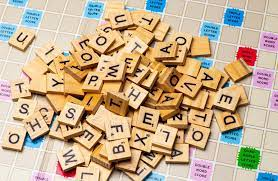 <br>The following examples randomly select a pattern, incrementally increases its size, and returns the number of matches in a given text. Illustrated in Line Graph and Boxplots. 

In [54]:
#example showing the nested functions of generating random pattern of length M in random text of length N

def generate_random_text(length_of_text):
    random_text = ''.join(random.choices(string.digits, k=length_of_text))
    return random_text

def get_random_pattern_from_text(pattern_size, input_text):
    l=len(input_text)
    text=list(input_text)
    rand = int(np.random.randint(l-pattern_size, size=1))
    random_pattern = text[rand:rand+pattern_size]
    return ''.join(random_pattern)

########### call the function ##########
test_random_text = generate_random_text(1000)
test_pattern = get_random_pattern_from_text(pattern_size=3, input_text=test_random_text)
test_number_matches = naive(test_pattern, test_random_text)

print(f'The randomly generated pattern - \033[1m{test_pattern}\033[0m - was found - \033[1m{test_number_matches}\033[0m - times in the randomly generated text: \n \033[1m {test_random_text}')



The randomly generated pattern - 954 - was found - 1 - times in the randomly generated text: 
  7428880699072740716955089987672485534128042647406549533912793974902081324178731243806939848706848429098136628845816915093797045890424123739646927796178067348687804438208718820701210891245862342189718849024478961452142569922665348971806583471227204460264499056689536618353686400597766010647057488218251820644980027920611982742484585051196363117974723000789014065594049216738314426684504417166339313024434228372931992201584288782606825088468717746055152827425616790867529045036664295961228921730947940054137032974061596469090266380096561839896781707092077116869480190813121754375432228689709313039980959465560215612724268369935077041089021657762381248549382501743495378455947401855364590167736539076742233955487501721702987299898234322207833148968783980717166013022340973995404086500558716445759750609791355167449512297632757928302491686604842531053559133389893688265718719345140361897751669530170689831511

In [10]:
# Import Text that will be used in the rest of the examples as the input text

with open("MLK Dream Speech.pdf", "rb") as pdf_file:
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    page = read_pdf.pages[0]
    MLK_speech = page.extractText()
# print(MLK_speech)

  0%|          | 0/100 [00:00<?, ?it/s]

,num_patterns_matching,time_in_seconds
length_of_randomly_generated_pattern,,
1,184,0.022
2,6,0.024
3,1,0.025
4,6,0.026
5,7,0.027
...,...,...
96,1,0.120
97,1,0.121
98,1,0.122


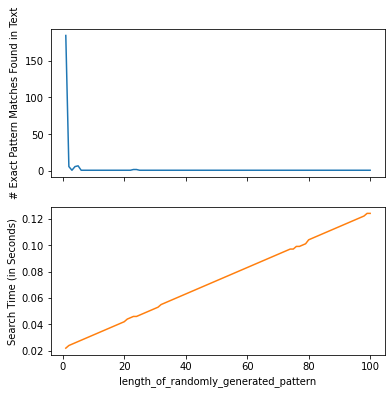

In [11]:
def incr_pattern_size_linegraph(len_patterns, input_text):
    length_p, matches, times = [], [], []
    
    time_before = time.time() #time it
    for len_pattern in tqdm(range(1, len_patterns+1)):
        rand_pattern = get_random_pattern_from_text(pattern_size=len_pattern, input_text=input_text) #can change length of text
        txt = naive(rand_pattern, input_text)
        time_after = time.time()
        matches.append(txt)
        times.append(round(time_after-time_before, 3))
        length_p.append(len_pattern)
                    
    df = (pd.DataFrame({'length_of_randomly_generated_pattern':length_p,
                             'num_patterns_matching': matches,
                    'time_in_seconds': times}).set_index('length_of_randomly_generated_pattern'))

    axes = df.plot.line(subplots=True, sharey=False, legend=False, figsize= (6,6))
    type(axes)
    
    axes[0].set_ylabel('# Exact Pattern Matches Found in Text')
    axes[1].set_ylabel('Search Time (in Seconds)')
    
    return df # to visualize dataframe

########### call the function ##########

incr_pattern_size_linegraph(len_patterns=100, input_text=MLK_speech)


  0%|          | 0/10 [00:00<?, ?it/s]

,time_in_seconds,num_patterns_matching
length_of_randomly_generated_pattern,,
1,0.022,148
1,0.023,182
1,0.024,94
1,0.025,563
1,0.027,300
...,...,...
10,0.145,1
10,0.146,1
10,0.147,1


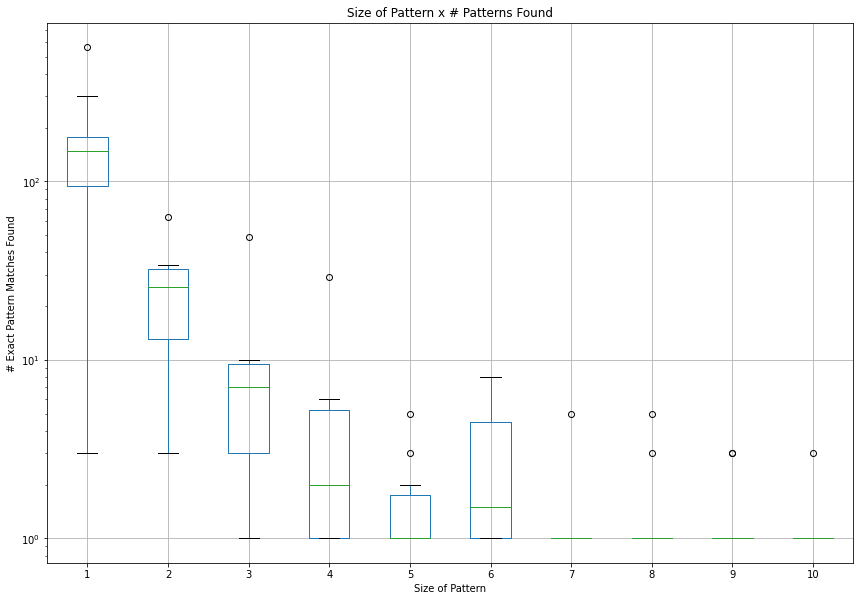

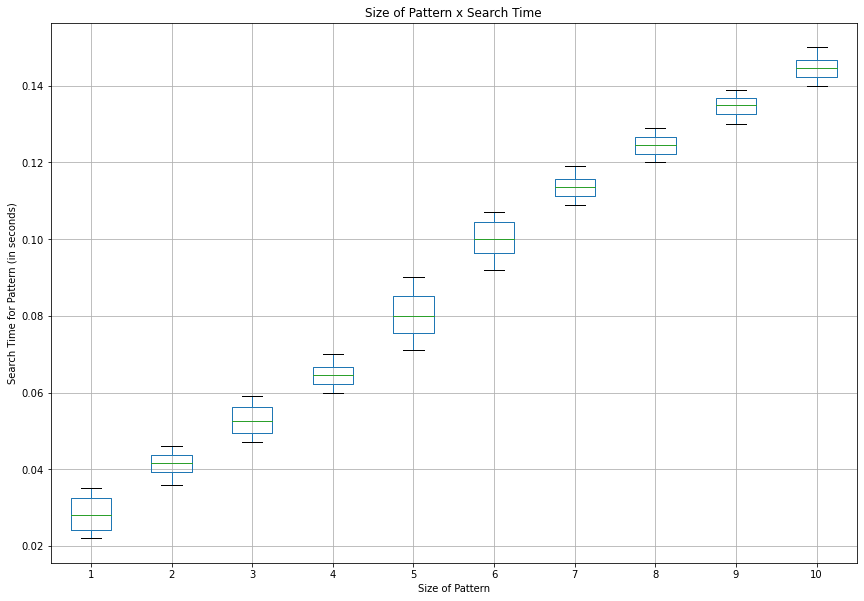

In [12]:
def incr_pattern_size_bp(len_patterns, repeats, input_text):
    length_p, matches, times = [], [], []
    
    time_before = time.time() #time it
    for len_pattern in tqdm(range(1, len_patterns+1)):
        for repeat in range(repeats):
            rand_pattern = get_random_pattern_from_text(pattern_size=len_pattern, input_text=input_text) #can change length of text
            txt = naive(rand_pattern, input_text)
            time_after = time.time()
            matches.append(txt)
            times.append(round(time_after-time_before, 3))
            length_p.append(len_pattern)

    df = (pd.DataFrame({'length_of_randomly_generated_pattern':length_p,
                        'time_in_seconds': times, 
                    'num_patterns_matching': matches}).set_index('length_of_randomly_generated_pattern'))
    bxplot= df.boxplot(column='num_patterns_matching', by='length_of_randomly_generated_pattern',
                      figsize=(14,10))
    bxplot2= df.boxplot(column='time_in_seconds', by='length_of_randomly_generated_pattern',
                      figsize=(14,10))
    
    bxplot.set_ylabel('# Exact Pattern Matches Found')
    bxplot.set_xlabel('Size of Pattern')
    bxplot.set_title('Size of Pattern x # Patterns Found')
    bxplot.get_figure().suptitle('')
    bxplot.set_yscale('log')
    
    bxplot2.set_ylabel('Search Time for Pattern (in seconds)')
    bxplot2.set_xlabel('Size of Pattern')
    bxplot2.set_title('Size of Pattern x Search Time')
    bxplot2.get_figure().suptitle('')

    return df # to visualize dataframe



########### call the function ##########

incr_pattern_size_bp(len_patterns=10, repeats=10, input_text=MLK_speech)



**Takeaways of Experiment 3: The multiple graphs in this experiment showed that increasing the size of a randomly chosen pattern increased the search time and decreased the pattern matches in a given text.** <br><br>

-----------------------------------

**Experiment 4**: This example returns a graph illustrating variable patterns of size M and the number of matches found in an increasing sized text of size N (multiple line graph with each line representing random pattern of size M)


  0%|          | 0/5 [00:00<?, ?it/s]

,length_of_randomly_generated_pattern,num_patterns_matching
length_of_searched_text,,
1.e+001,1,2
1.e+001,2,1
1.e+001,3,1
1.e+001,4,1
1.e+001,5,1
1.e+002,1,14
1.e+002,2,2
1.e+002,3,1
1.e+002,4,1


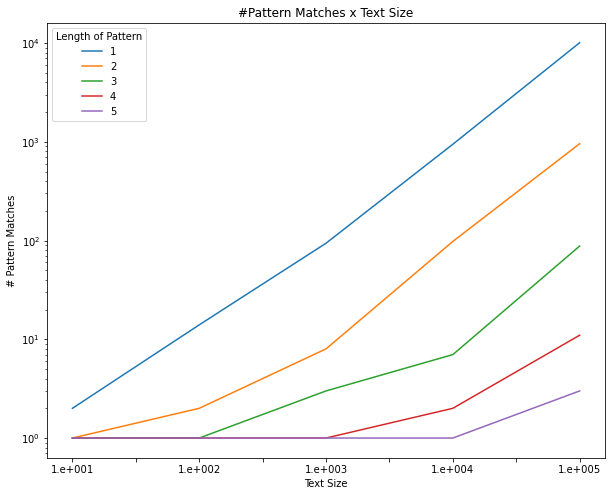

In [13]:
def incr_pattern_size_mutli_linegraph(len_patterns):
    length_p, matches, length_t = [], [], []
    
    for value in tqdm([10, 100, 1000, 10000, 100000]):
        for len_pattern in range(1, len_patterns+1):
            random_text = ''.join(random.choices(string.digits, k=value)) 
            pattern = get_random_pattern_from_text(pattern_size=len_pattern, input_text=random_text) # can change text size
            txt = naive(pattern, random_text)
            matches.append(txt)
            length_p.append(len_pattern)
            length_t.append(value)
            
    length_t_sci = [] #convert x-axis/ length of text to scientific notation
    for t in length_t:
        sci = np.format_float_scientific(t, precision = 1, exp_digits=3)
        length_t_sci.append(sci)
        
    fig, ax = plt.subplots()
    
    df = pd.DataFrame({'length_of_randomly_generated_pattern':length_p,
                    'num_patterns_matching': matches,
                    'length_of_searched_text': length_t_sci}).set_index('length_of_searched_text')
    
    df.groupby('length_of_randomly_generated_pattern')['num_patterns_matching'].plot(title=
            '#Pattern Matches x Text Size', figsize=(10,8),legend=True, logy=True,
            xlabel='Text Size', ylabel='# Pattern Matches', ax=ax)
    ax.legend(title='Length of Pattern')
    
    return df # to show the dataframe




########### call the function ##########
incr_pattern_size_mutli_linegraph(len_patterns=5)

**Takeaways of Experiment 4: The multiple lines in this experiment showed that increasing the size of a randomly chosen pattern decreased the pattern matches in a given text. It also showed again that increasing the size of the text, increases the number of patterns found across the board.**

----------------

**Experiment 5**: *We can see the exact same trend with the approximate matching algorithm, although steeper slopes since we include more correct matches by allowing errors.* <br>This example returns a graph illustrating the decrease in pattern matches with increased length of pattern for the Naive Approximate Alg

  0%|          | 0/6 [00:00<?, ?it/s]

,length_of_randomly_generated_pattern,num_patterns_matching
length_of_searched_text,,
10,1,10
10,2,4
10,3,1
10,4,1
10,5,1
100,1,100
100,2,18
100,3,5
100,4,1


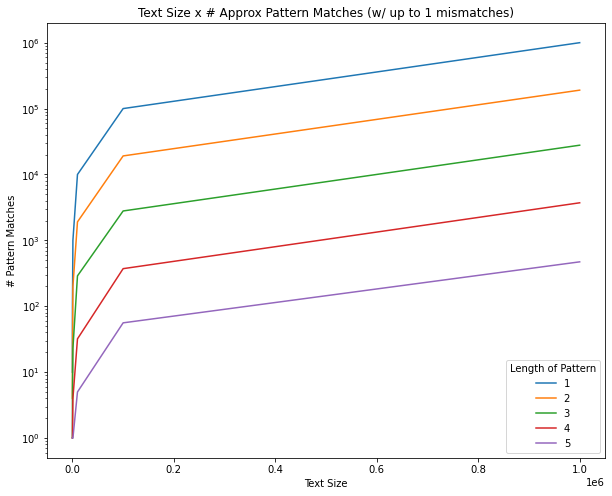

In [14]:
def incr_pattern_size_mutli_linegraph_approx(len_patterns, max_mismatch):
    length_p, matches, length_t = [], [], []
    
    for value in tqdm([10,100,1000, 10000, 100000, 1000000]):
        for len_pattern in range(1, len_patterns+1):
            random_text = ''.join(random.choices(string.digits, k=value)) 
            pattern = get_random_pattern_from_text(pattern_size=len_pattern, input_text=random_text)
            txt = naive_approx(pattern, random_text, max_mismatch)
            matches.append(txt)
            length_p.append(len_pattern)
            length_t.append(value)
            
    fig, ax = plt.subplots()
    
    df = pd.DataFrame({'length_of_randomly_generated_pattern':length_p,
                    'num_patterns_matching': matches,
                    'length_of_searched_text': length_t}).set_index('length_of_searched_text')
    
    df.groupby('length_of_randomly_generated_pattern')['num_patterns_matching'].plot(
        title=f'Text Size x # Approx Pattern Matches (w/ up to {max_mismatch} mismatches)',
        figsize=(10,8),legend=True, logy=True, xlabel='Text Size', ylabel='# Pattern Matches', ax=ax)
    
    ax.legend(title='Length of Pattern')     

    return df

########### call the function ##########

incr_pattern_size_mutli_linegraph_approx(len_patterns=5, max_mismatch=1)

**Takeaways of Experiment 5: The multiple lines in this experiment showed that increasing the size of a randomly chosen pattern decreased the pattern matches in a given text. It also showed again that increasing the size of the text, increases the number of patterns found across the board. In comparison to the naive exact algorithm, the naive approximate algorithm results in more matches across the board.**

----------------

-----------

**Experiment 6**: Take Shakespeare's complete works as the searched text. Create a dictionary with each word as the key and the word's probability of appearing in the text as the value. Considering it's probability of appearing in the text, select a random word of length N. Then find the word in the text of increasing size. Lastly, repeat this search a few times and graph the results. 

In [15]:
# New Experiment on Shakespeare's Complete Works (SCW)

SCW = open("complete-works-of-william-shakespeare.txt").read()
SCW = SCW[10880:] # cut copyright
len(SCW)

5510395

In [16]:
# SCW_words = SCW.split()
# Counter(SCW_words).most_common(12)

In [17]:
# Step A: Generate a dictionary of the words as keys and their probability of appearing in SCW as values

def tokenize(string):
    return re.compile('\w+').findall(string)

def word_freq(input_file):
#     txt = open(input_file).read()
    text = tokenize(input_file.lower())
    c = Counter(text)           # count the words
    d = Counter(''.join(text))  # count all letters
    words, letters = dict(c) , dict(d) # return a tuple of counted words and letters
    sumWords = sum(words.values())       # sum total words
    sumLetters = sum(letters.values())   # sum total letters
    
    for w in words:
        words[w] = words[w]/sumWords
    for l in letters:
        letters[l] = letters[l]/sumLetters
    return words, letters

#call function and return probability dictionary of words/characters
SP_words, SP_letters = word_freq(SCW)
sum(SP_words.values()), SP_words

(1.0000000000001465,
 {'1': 0.00032182687201274564,
  'from': 0.0028114710568242166,
  'fairest': 4.460966542750929e-05,
  'creatures': 4.03611258629846e-05,
  'we': 0.003838555496548062,
  'desire': 0.00023260754115772702,
  'increase': 2.9739776951672864e-05,
  'that': 0.012252788104089219,
  'thereby': 2.7615507169410516e-05,
  'beauty': 0.00024747742963356344,
  's': 0.008200743494423792,
  'rose': 7.222517259691981e-05,
  'might': 0.0005310674455655868,
  'never': 0.0010833775889537971,
  'die': 0.0005045140732873075,
  'but': 0.006667020711630377,
  'as': 0.006337758895379713,
  'the': 0.02931067445565587,
  'riper': 3.186404673393521e-06,
  'should': 0.0016739245884227296,
  'by': 0.004723313860860329,
  'time': 0.001406266595857674,
  'decease': 6.372809346787042e-06,
  'his': 0.00728518321826872,
  'tender': 0.00015825809877854487,
  'heir': 0.00011577270313329793,
  'bear': 0.000587360594795539,
  'memory': 6.160382368560807e-05,
  'thou': 0.005893786510886883,
  'contracted'

In [18]:
# Step B: Generate a truly random pattern (weigh random selection of said word by its prob of appearing in text). Choose word of length X

def rand_pattern_based_on_prob(dictionary, length_pattern):
    #select words from dictionary that are only of desired length, add to newDict
    filtered_dict = {}
    for (key, value) in dictionary.items():
        if len(key) == length_pattern:
            filtered_dict[key] = value
    
    #select random pattern based on probability of appearing in the text from the filtered_dictionary
    rand_pat = random.choices(list(filtered_dict.keys()), weights=filtered_dict.values(), k=1)[0]
    return rand_pat

rand_pattern_based_on_prob(dictionary=SP_words, length_pattern=4)



'deny'

  0%|          | 0/6 [00:00<?, ?it/s]

,num_patterns_matching
length_of_searched_text,
1.e+004,1
1.e+005,13
1.e+006,71
2.e+006,143
3.e+006,236
5.e+006,368


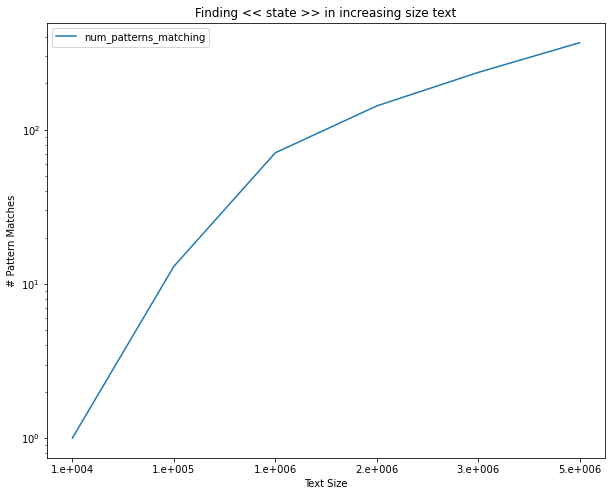

In [19]:
# Illustrating searching a text for a pattern in increasingly long segments of that same text

def incr_text_size(input_file, len_pattern):
    matches, length_t = [], []
    prob_words, prob_letters = word_freq(input_file)
    pattern = rand_pattern_based_on_prob(dictionary=prob_words, length_pattern=len_pattern)
    
    for value in tqdm([10000, 100000, 1000000, 2000000, 3000000, 5000000]):
            txt = naive(pattern, input_file[:value])
            matches.append(txt)
            length_t.append(value)
            
    length_t_sci = [] #convert x-axis/ length of text to scientific notation
    for t in length_t:
        sci = np.format_float_scientific(t, precision = 1, exp_digits=3)
        length_t_sci.append(sci)
            
    df = pd.DataFrame({ 'num_patterns_matching': matches,
                    'length_of_searched_text': length_t_sci}).set_index('length_of_searched_text')
    
    df.plot(title=
            f"Finding << {pattern} >> in increasing size text", figsize=(10,8),
            xlabel='Text Size', ylabel='# Pattern Matches', logy=True) # logy=True
    
    return df

########### call the function ##########
incr_text_size(input_file=SCW,len_pattern=5)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

,length_of_randomly_generated_pattern,random_pattern_word,num_patterns_matching
length_of_searched_text,,,
1.e+006,1,s,40209
2.e+006,1,s,80046
3.e+006,1,s,120251
5.e+006,1,s,199717
1.e+006,2,in,8534
2.e+006,2,in,17929
3.e+006,2,in,26321
5.e+006,2,in,42768
1.e+006,3,his,2237


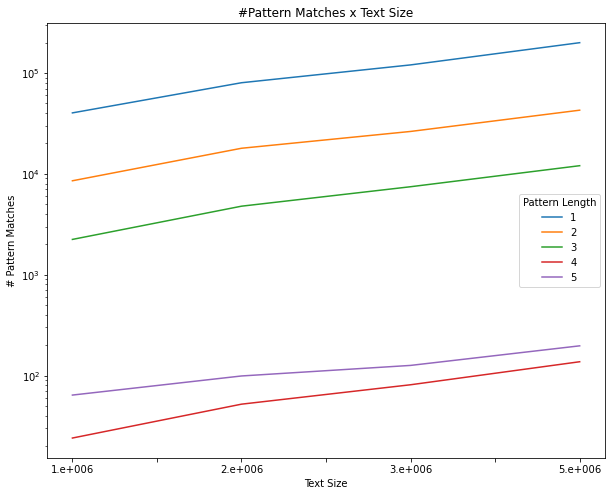

In [20]:
# Step C-E: Search the text for the randomly selected words, repeat a few times, repeat on consecutively larger text segments

def incr_pattern_size_mutli_linegraph(input_file, len_patterns):
    length_p, pat, matches, length_t = [], [], [], []
    prob_words, prob_letters = word_freq(input_file)
    
    for len_pattern in range(1, len_patterns+1):
        pattern = rand_pattern_based_on_prob(dictionary=prob_words, length_pattern=len_pattern) # can change text size
        for value in tqdm([1000000, 2000000, 3000000, 5000000]):
            txt = naive(pattern, input_file[:value])
            matches.append(txt)
            length_p.append(len_pattern)
            length_t.append(value)
            pat.append(pattern)
            
    length_t_sci = [] #convert x-axis/ length of text to scientific notation
    for t in length_t:
        sci = np.format_float_scientific(t, precision = 1, exp_digits=3)
        length_t_sci.append(sci)
        
    fig, ax = plt.subplots()
    
    df = pd.DataFrame({'length_of_randomly_generated_pattern':length_p,
                       'random_pattern_word' : pat,
                    'num_patterns_matching': matches,
                    'length_of_searched_text': length_t_sci}).set_index('length_of_searched_text')
    
    df.groupby('length_of_randomly_generated_pattern')['num_patterns_matching'].plot(title=
            '#Pattern Matches x Text Size', figsize=(10,8),legend=True,
            xlabel='Text Size', ylabel='# Pattern Matches', ax=ax, logy=True) #logy=True
    ax.legend(title='Pattern Length') 
    
    return df

########### call the function ##########
incr_pattern_size_mutli_linegraph(input_file=SCW,len_patterns=5)

**Takeways of Experiment 6: The multiple lines in this experiment showed that increasing the size of a randomly chosen pattern decreased the pattern matches in a given text. It also showed again that increasing the size of the text, increases the number of patterns found across the board.**


-----------

**Experiment 7**: How many exact matches are found for increasing G, A, C, T repeats? For example: How many matches are found for 'A', 'AA', 'AAA', 'AAAA', etc? How many matches are found for 'G', 'GG'...'GGGGGG'?<br>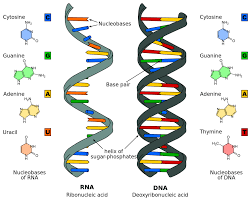 *We expect that the longer patterns have fewer matches than the shorter patterns (as seen previously)*


In [31]:
# Import the E.Coli Fasta File to Use as an Example


# read the whole file and put it in T without the header
file = open("E_coli_genome.fasta")
# print the header as information data
print("\033[1mHeader:\033[0;0m\n",file.readline())
# insert the data into T and replace the new lines with nothing
T = file.read().replace("\n", "").replace(" ", "")
# close the file
file.close()
# show T
print("\033[1mNucleotide_Sequence:\033[0;0m\n",T[:100],"...\n")
# define p
pattern = "AGC"
print("\033[1mpattern:\033[0;0m\n",pattern)

Header:
 >Chromosome dna:chromosome chromosome:ASM584v2:Chromosome:1:4641652:1 REF

Nucleotide_Sequence:
 AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAAT ...

pattern:
 AGC


First we will investigate the nucleotide composition of the provided E. coli DNA:
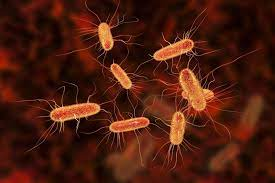
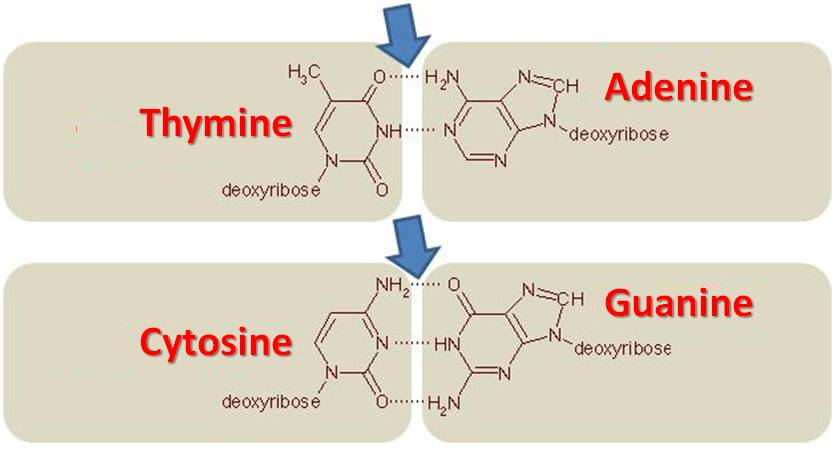

In [22]:
def percent_nucleotide_composition(nucleotide, nucleotide_seq):
    percentage = (nucleotide_seq.count(nucleotide) / len(nucleotide_seq)) * 100
    print (f"A total of {percentage:.1f}% of the nucleotide sequence is composed of {nucleotide}")
    
########### call the function ##########
percent_nucleotide_composition(nucleotide='A', nucleotide_seq=T)
percent_nucleotide_composition(nucleotide='C', nucleotide_seq=T)
percent_nucleotide_composition(nucleotide='G', nucleotide_seq=T)
percent_nucleotide_composition(nucleotide='T', nucleotide_seq=T)

    

A total of 24.6% of the nucleotide sequence is composed of A
A total of 25.4% of the nucleotide sequence is composed of C
A total of 25.4% of the nucleotide sequence is composed of G
A total of 24.6% of the nucleotide sequence is composed of T


Choice of nucleotide = choice = $\frac{1}{4}$<br>
Length of sequence = N = 4641652 <br>
Number of Repeats = r <br>
weight (% of A & T) in sequence = 0.246 <br>
weight (% of C & G) in sequence = 0.254<br>



$$ E[nucleotide] = weight * choice^{r-1} * N $$

In [23]:
print('\033[1mTheoretical Expected Values for Increasing Pattern Size in Increasing Text Size\033[0m')
print('In the expected calculations, we take into account the % of each nucleotide in the sequence. We add these as weights to the calculation')
theor_nuc_len = pd.DataFrame(data={'Nucleotide A':[1141846, 285462, 71365, 17841, 4460],
                              'Nucleotide T':[1141846, 285462, 71365, 17841, 4460],
                              'Nucleotide G':[1178980, 294745, 73686, 18422, 4605],
                              'Nucleotide C':[1178980, 294745, 73686, 18422, 4605]},
                              index=[1, 2, 3, 4, 5])
theor_nuc_len.index.name = 'Repeats'
theor_nuc_len

Theoretical Expected Values for Increasing Pattern Size in Increasing Text Size
In the expected calculations, we take into account the % of each nucleotide in the sequence. We add these as weights to the calculation


,Nucleotide A,Nucleotide T,Nucleotide G,Nucleotide C
Repeats,,,,
1,1141846,1141846,1178980,1178980
2,285462,285462,294745,294745
3,71365,71365,73686,73686
4,17841,17841,18422,18422
5,4460,4460,4605,4605


<AxesSubplot:title={'center':'Cystosine'}, xlabel='Repeats', ylabel='# Pattern Matches'>

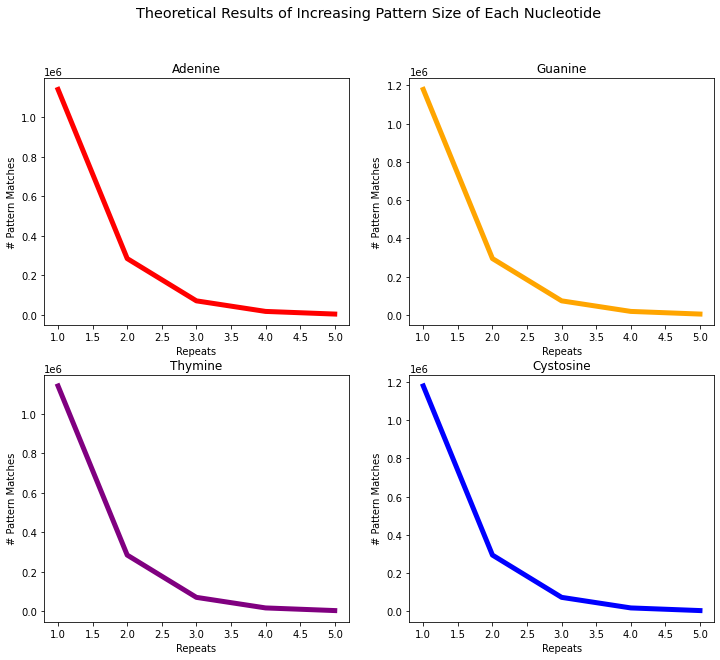

In [24]:
fig, axes = plt.subplots(2,2)

fig.suptitle("Theoretical Results of Increasing Pattern Size of Each Nucleotide", fontsize="x-large")

theor_nuc_len['Nucleotide A'].plot(title='Adenine',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', c='red', ax= axes[0,0])
theor_nuc_len['Nucleotide G'].plot(title='Guanine', c='orange',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', ax= axes[0,1])
theor_nuc_len['Nucleotide T'].plot(title='Thymine', c='purple',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', ax= axes[1,0])
theor_nuc_len['Nucleotide C'].plot(title='Cystosine', c='blue',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', ax= axes[1,1])
                  
                  
                  
                  

In [25]:
def incr_nucleotide_repeats(max_len_nucleotides, nucleotide_seq):
    
    length_n, matches_A, matches_C, matches_G, matches_T = [], [], [], [], [] 
    
    for len_n in tqdm(range(1, max_len_nucleotides+1)):
       
        pattern = 'A' * len_n #for Adenine (A)
        txt = naive(pattern, text=nucleotide_seq)
        matches_A.append(txt)
                    
        pattern = 'C' * len_n # for Cytosine (C)
        txt = naive(pattern, text=nucleotide_seq)
        matches_C.append(txt)
        
        pattern = 'G' * len_n # for Guanine (G)
        txt = naive(pattern, text=nucleotide_seq)
        matches_G.append(txt)
        
        pattern = 'T' * len_n # for Thymine (T)
        txt = naive(pattern, text=nucleotide_seq)
        matches_T.append(txt)
        
        length_n.append(len_n)
        
    df = (pd.DataFrame({'length_of_nucleotide_repeats':length_n,
                        'Num_A*_Matches': matches_A,
                        'Num_C*_Matches': matches_C,
                        'Num_G*_Matches': matches_G,
                        'Num_T*_Matches': matches_T,
                       }).set_index('length_of_nucleotide_repeats'))
    
    
    return df

########### call the function ##########
print('Empirical Values')
incr_nucleotide_repeats(max_len_nucleotides=5, nucleotide_seq=T)

Empirical Values


  0%|          | 0/5 [00:00<?, ?it/s]

,Num_A*_Matches,Num_C*_Matches,Num_G*_Matches,Num_T*_Matches
length_of_nucleotide_repeats,,,,
1,1142742,1180091,1177437,1141382
2,338006,271821,270252,339584
3,108964,47807,47515,109862
4,35148,8863,8723,35619
5,11479,1518,1457,11655


  0%|          | 0/5 [00:00<?, ?it/s]

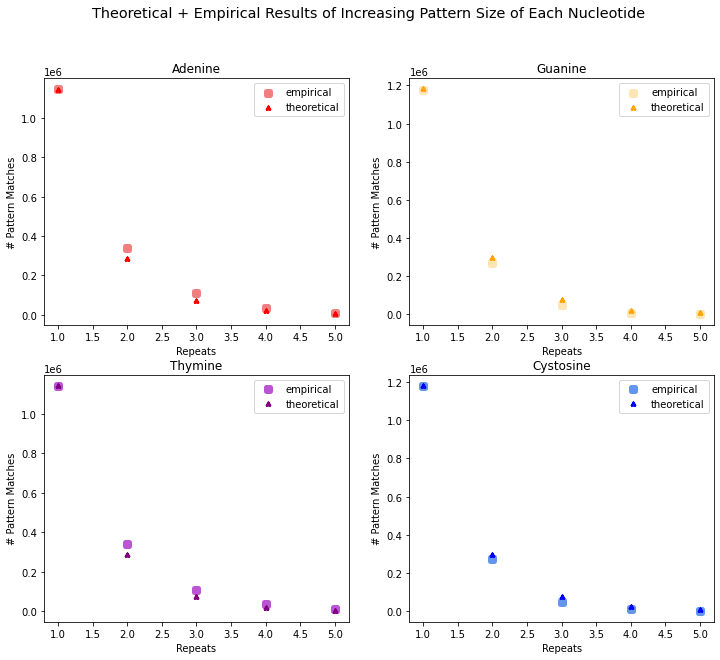

In [26]:
fig, axes = plt.subplots(2,2)

fig.suptitle("Theoretical + Empirical Results of Increasing Pattern Size of Each Nucleotide", fontsize="x-large")

df = incr_nucleotide_repeats(max_len_nucleotides=5, nucleotide_seq=T)
df.reset_index().plot.scatter(x='length_of_nucleotide_repeats' , y='Num_A*_Matches' , marker='s',label='empirical',title='Adenine', xlabel='# of Nucleotide Repeats (Size of Repeats)',
                ylabel='# of Pattern Matches', figsize=(12,10), lw=5, c='lightcoral', ax= axes[0,0])
df.reset_index().plot.scatter(x='length_of_nucleotide_repeats' , y='Num_G*_Matches' , marker='s',label='empirical',title='Guanine', c='moccasin', xlabel='# of Nucleotide Repeats (Size of Repeats)',
                ylabel='# of Pattern Matches', figsize=(12,10), lw=5, ax= axes[0,1])
df.reset_index().plot.scatter(x='length_of_nucleotide_repeats' , y='Num_T*_Matches' , marker='s',label='empirical',title ='Thymine', c='mediumorchid',xlabel='# of Nucleotide Repeats (Size of Repeats)',
                ylabel='# of Pattern Matches', figsize=(12,10), lw=5, ax= axes[1,0])
df.reset_index().plot.scatter(x='length_of_nucleotide_repeats' , y='Num_C*_Matches' , marker='s',label='empirical',title='Cystosine', c='cornflowerblue',xlabel='# of Nucleotide Repeats (Size of Repeats)',
                ylabel='# of Pattern Matches', figsize=(12,10), lw=5, ax= axes[1,1])

theor_nuc_len.reset_index().plot.scatter(x = 'Repeats', y='Nucleotide A', marker='1', label='theoretical', title='Adenine',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', c='red', ax= axes[0,0])
theor_nuc_len.reset_index().plot.scatter(x = 'Repeats', y='Nucleotide G', marker='1', label='theoretical', title='Guanine', c='orange',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', ax= axes[0,1])
theor_nuc_len.reset_index().plot.scatter(x = 'Repeats', y='Nucleotide T', marker='1', label='theoretical',title='Thymine', c='purple',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', ax= axes[1,0])
theor_nuc_len.reset_index().plot.scatter(x = 'Repeats', y='Nucleotide C', marker='1', label='theoretical',title='Cystosine', c='blue',
                   figsize=(12,10), lw=5, ylabel='# Pattern Matches', ax= axes[1,1]);


    
    

**Takeaways of Experiment 7: This experiment showed that increasing the size of consecutive nucleotide repeats decreased the pattern matches within the sequence. We also saw that the empirical results closely resembled our expected theoretical values.**

----------------

## Summary Complexity Table


- $n$ is the length of the text
- $m$ is the length of the pattern
- $c$ number of chars in the text<br><br>
Large constants* in suffix tree is the nodes & dictionaries
--------------------------------------------------------------------------

<b><u>Running Time:</u></b><br>

|   Algorithm   | Storage    |     Time      |
|:-------------:|:----------:|:-------------:|
| Naive         | O(m + n)   | O(m x n)      |
| Suffix Tree   | O(n)*      | O(m)          |
| BWT           | O(n × c)   | O(m)          |

--------------------------------------------------------------------------

<b><u>Construction Time:</u></b><br>

|   Algorithm   | Storage    |     Time      |
|:-------------:|:----------:|:-------------:|
| Suffix Tree   | O(n)*      | O($n^2$)       |
| BWT           | O(n × c)   | O(n × c)      |



---------------------------------------------------------------------------
---------------------------------------------------------------------------

---------------------------------------------------------------------------
---------------------------------------------------------------------------

# <b>Suffix Tree</b> (no Suffix links):

**Suffix of a word** is a substring from the last character that ends in the last character: $\leftarrow$ word[i,n]<br><br>
> For example:<br> word = **banana**<br>
> Suffixes: **banana, anana, nana, ana, na, a** 

The suffix tree for the string T of length n is defined as a tree such that: <br>

1. The tree has exactly n leaves.
2. Except for the root, every internal node has at least two children.
3. Each edge is labelled with a non-empty substring of S.
4. No two edges starting out of a node can have string-labels beginning with the same character.
5. The string obtained by concatenating all the string-labels found on the path from the root to leaf i spells out suffix T[i..n], for i from 1 to n.
6. Each node holds its own number of children, and a leaf holds 1.
7. The number of children at a particular node shows the number of repetitions in the string.

Since such a tree does not exist for all strings, T is padded with a terminal symbol not seen in the string (usually denoted `$`). This ensures that no suffix is a prefix of another, and that there will be n leaf nodes, one for each of the n suffixes of S. <br>
Since all internal non-root nodes are branching, there can be at most:
1. $n −  1$ such nodes<br>
2. $n + (n − 1) + 1 = 2n$ nodes in total <br>
(n leaves, $n − 1$ internal non-root nodes, 1 root).
<br>
<br>
<b>banana example:</b>
<img src="Suffix_tree.png" >

<div class="alert alert-block alert-info">
<b>For an interactive suffix tree construction, visit:</b> https://visualgo.net/en/suffixtree<br><br>
</div>

In [55]:
class SuffixTree(object):
    
    class Node(object):
        def __init__(self, data):
            self.data = data
            self.next = {} 
            
    def __init__(self, T):
        self.text = T
        T += '$'
        self.unique = list(set(self.text))
        self.root = self.Node(None)
        self.root.next[T[0]] = self.Node(T) 
        for i in range(1, len(T)):
            cur = self.root
            j = i
            while j < len(T):
                if T[j] in cur.next:
                    child = cur.next[T[j]]
                    data = child.data
                    k = j+1 
                    while k-j < len(data) and T[k] == data[k-j]:
                        k += 1
                    if k-j == len(data):
                        cur = child
                        j = k
                    else:
                        cExist, cNew = data[k-j], T[k]
                        mid = self.Node(data[:k-j])
                        mid.next[cNew] = self.Node(T[k:])
                        mid.next[cExist] = child
                        child.data = data[k-j:]
                        cur.next[T[j]] = mid
                else:
                    cur.next[T[j]] = self.Node(T[j:])
    
    def followPath(self, T):
        cur = self.root
        i = 0
        while i < len(T):
            c = T[i]
            if c not in cur.next:
                return (None, None)
            child = cur.next[T[i]]
            data = child.data
            j = i+1
            while j-i < len(data) and j < len(T) and T[j] == data[j-i]:
                j += 1
            if j-i == len(data):
                cur = child 
                i = j
            elif j == len(T):
                return (child, j-i)
            else:
                return (None, None) 
        return (cur, None) 

    def countNodes(self, node):      
        count = 1
        if len(node.next) == 0:
            count += 1
        for child in node.next:
            count += self.countNodes(node.next[child]) - 1
        return count  
    
    def count_nodes(self, p):
        node, off = self.followPath(p)
        if node is None:
            return 0
        return self.countNodes(node) - 1
    
  

In [56]:
sample_from_genome = "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCT"
p = 'AGC'

In [57]:
print("According to the suffix tree approach: \nThe number of times the sample p appears within the genome string is",SuffixTree(sample_from_genome).count_nodes(p),"times")

According to the suffix tree approach: 
The number of times the sample p appears within the genome string is 7 times


In [58]:
SuffixTree("banana").count_nodes("ana")

2

In [59]:
# More info about other different suffix trees:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Suffix_tree', width=1000, height=450)

---------------------------------------------------------------------------
---------------------------------------------------------------------------

# <b>Burrows–Wheeler Transform</b>

Reversible permutation of the characters of a string, used for compression.

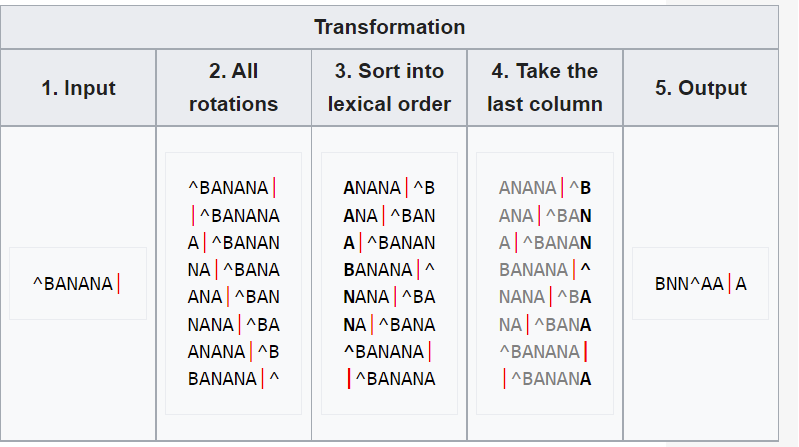
to get the burrows wheeler matrix. 

The burrows wheeler transform is the final row of the matrix read from top to bottom

How is it useful for compression? tendency for like characters to come together into runs/clumps because the BWT is sorted by its right-context, the characters that come after them, which adds additional structure to the BWT, and makes it more compressible (run-length encoding)

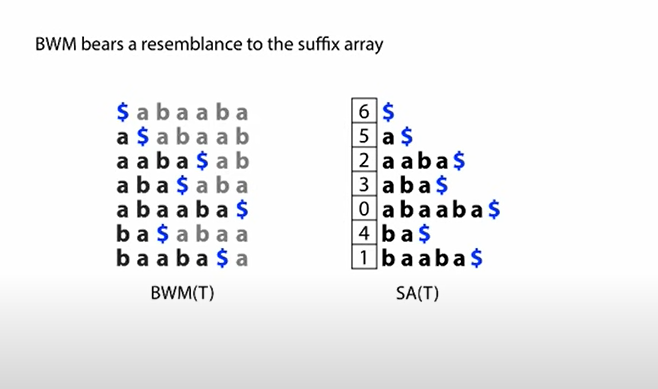 the order of the rotations is the same order as the suffixes in a suffix array
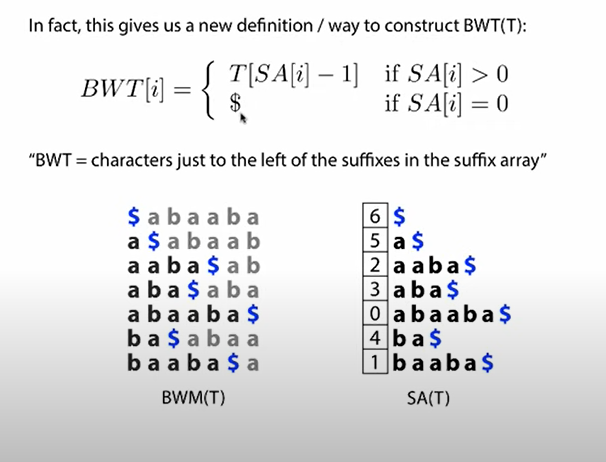
New way to construct BWT-- characters just to the left of the suffixes in a suffix aray



In [60]:
# e.g. select the text and the pattern
txt = "banana$"
pat = "an"

### Two options are available for getting the BWT array:
---------------------------------------------------------------------------------------
#### 1. Rotation & Sort Method for getting BWT array:

In [61]:
# make a list for all rotations
def rotations(t):
    t_size = len(t)
    dt = t * 2
    return [dt[i:i+t_size] for i in range(t_size)]

# sort the rotations
def bwm(t):
    return sorted(rotations(t))

# Take the last column
def bwt_bwm(t):
    return ''.join(map(lambda x: x[-1], bwm(t)))

bwt = bwt_bwm(txt)
print(bwt)

annb$aa


In [62]:
print("Perform all the rotations for:",txt)
print("\n\033[1mThe Burrows–Wheeler Matrix:\033[0m")
for row in bwm(txt):
    print("%s\033[1m\033[36m%s\033[0m" % tuple([row[:-1]]+[row[-1]]))
print("\n\033[1mThe Burrows–Wheeler Transform (BWT) is",bwt,"\033[0m")

Perform all the rotations for: banana$

The Burrows–Wheeler Matrix:
$banana
a$banan
ana$ban
anana$b
banana$
na$bana
nana$ba

The Burrows–Wheeler Transform (BWT) is annb$aa 


---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
#### 2. Matrix Method for getting BWT array: <br>
$$ BWT[i]=\left\{\begin{matrix}
T[SA[i] - 1] & if SA[i] > 0\\ 
\$ & if SA[i] = 0 
\end{matrix}\right. $$

In [63]:
# make a suffix array
def suffix_array(s):
    st = sorted([(s[i:], i) for i in range(len(s))])
    return map(lambda x: x[1], st)

# Take characters to the left of the sorted suffixes
def bwt_sa(t):
    bw = []
    for si in suffix_array(t):
        if si == 0: 
            bw.append('$')
        else:
            bw.append(t[si-1])
    return ''.join(bw)

print(bwt_sa(txt))

annb$aa


In [64]:
print("\n\033[1mThe Burrows–Wheeler Matrix:\033[0m\n")
print("\033[1m           \033[4m      SA(T)      \033[0m")
for z,row in enumerate(bwm(txt)):
    print("\033[92m\033[1m%s\033[0m%s\033[1m\033[36m%s\033[0m -> \033[93m%s\033[0m" % tuple([row[0:1]]+[row[1:-1]]+[row[-1]]+[sorted([(txt[i:], i) for i in range(len(txt))])[z]]))
print("\n\033[92m\033[1m* First column\033[0m")
print("\033[1m\033[36m* Last column\033[0m")


The Burrows–Wheeler Matrix:

                 SA(T)      
$banana -> ('$', 6)
a$banan -> ('a$', 5)
ana$ban -> ('ana$', 3)
anana$b -> ('anana$', 1)
banana$ -> ('banana$', 0)
na$bana -> ('na$', 4)
nana$ba -> ('nana$', 2)

* First column
* Last column


---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
### Building FM Index:

USE BWT AND LF MAPPING. Know how many matches. To find index of where these matches occur, have to do more
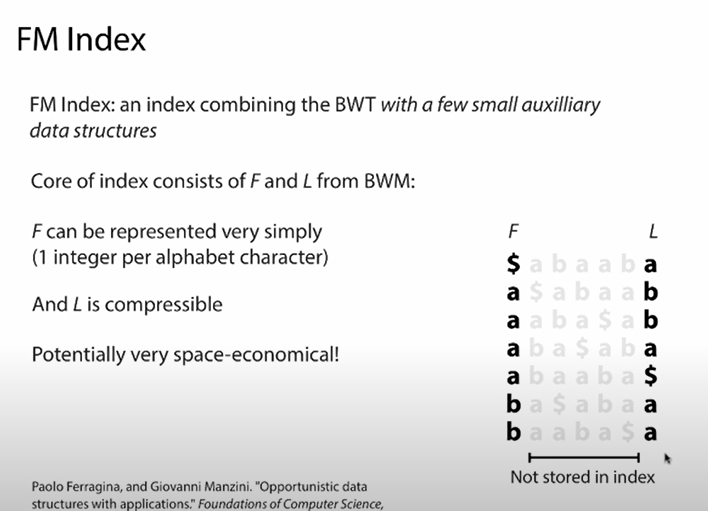
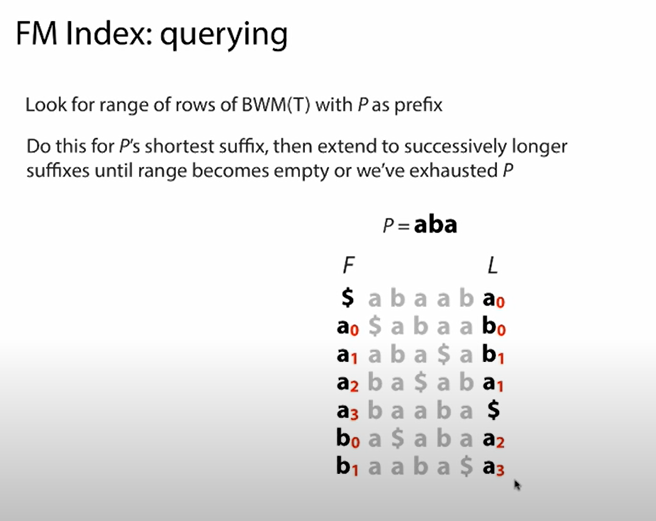


calculate the number of occurences of each character for each row
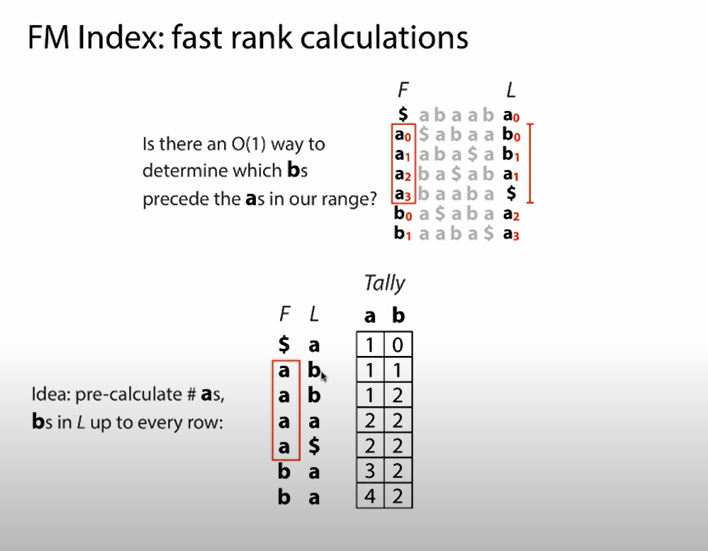


In [65]:
def FMIndex(bwt):
    # first row all zeros
    fm = [{c: 0 for c in bwt}]
    # add rows which counting the number of each symbol used
    for c in bwt:
        row = {symbol: (count + 1 if (symbol == c) else count) for symbol, count in fm[-1].items()}
        fm.append(row)
    offset = {}
    N = 0
    # use the last row to move on the symbols once and build the offset by
    # the number of repetations of each symbol
    for symbol in sorted(row.keys()):
        offset[symbol] = N
        N += row[symbol]
    return fm, offset

FM, Offset = FMIndex(bwt)

print("\033[1m                       \033[4m       FM IND       \033[0m")
print("\033[1mIND Suffix Arr BWT %5s,%5s,%5s,%5s\033[0m" % tuple([symbol for symbol in sorted(Offset.keys())]))
for i, row in enumerate(FM):
    print("\033[1m%3s\033[0m %10s %3s %5d,%5d,%5d,%5d" % tuple([i]+[sorted([(txt[z:]+txt[0:z]) for z in range(len(txt))])[i] if i < len(bwt) else "\033[91m  Counting\033[0m"]+[bwt[i]+':' if i < len(bwt) else '']+[row[symbol] for symbol in sorted(row.keys())]))
print("\n\033[1moffset:\033[0m ",[(sym, Offset[sym]) for sym in sorted(Offset.keys())])

                              FM IND       
IND Suffix Arr BWT     $,    a,    b,    n
  0    $banana  a:     0,    0,    0,    0
  1    a$banan  n:     0,    1,    0,    0
  2    ana$ban  n:     0,    1,    0,    1
  3    anana$b  b:     0,    1,    0,    2
  4    banana$  $:     0,    1,    1,    2
  5    na$bana  a:     1,    1,    1,    2
  6    nana$ba  a:     1,    2,    1,    2
  7   Counting         1,    3,    1,    2

offset:  [('$', 0), ('a', 1), ('b', 4), ('n', 5)]


---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
### Query Using FM Index (using offset, top row and bottom row):

In [66]:
def findBWT(FM,Offset, pattern):
    top_row = 0
    bottom_row = len(FM) - 1
    for ch in reversed(pattern):
        top_row = Offset[ch] + FM[top_row][ch]       # 5 + 0 = 5, 1 + 1 = 2
        bottom_row = Offset[ch] + FM[bottom_row][ch] # 5 + 2 = 7, 1 + 3 = 4
        
    return bottom_row - top_row

In [67]:
bwt = bwt_bwm(sample_from_genome+"$")
FM, Offset = FMIndex(bwt) 
print("According to the Burrows–Wheeler Transform approach: \nThe number of times the sample p appears within the Ts string is",findBWT(FM,Offset, p),"times")

According to the Burrows–Wheeler Transform approach: 
The number of times the sample p appears within the Ts string is 7 times


# <b>Experiments</b>
### <b>Alphabet size Vs Search pattern size Test:</b>

Let’s look when it will be correct to use each of the three algorithms (naïve, suffix tree, BWT),
what is the relationship between the different results and what case shows a better results.

The test was performed by taking a text with sizes: 10k - 100k (with 10K intervals) with average of 10 samples each, <br>
for 3 types of alphabet sizes: DNA (“C”,”A”,”T”,”G” means 4 chars), 26 chars and 52 chars.
* The pattern was composed of a random sample of the text.
* All the algorithms indeed identify the number of impressions of the pattern accurately within the text.
* The first row is the Algorithm’s construction times and other rows are the search times only. 
* The meanings of the graph are expressed as the text becomes larger.

<img src="Experiment Test Table_10points_10K_to_100K_explain_dots_A_B.png" >

* Points A and B are related to the examination of the significance of the differences between suffix tree and BWT (<b>see 1.0.6</b>)
* The green rectangle is related to suffix tree (<b>see 0.6.3.3</b>)
* The blue rectangle is related to BWT (<b>see 0.6.3.4</b>)

### <b>Worst Case Test:</b>
#### Naïve Algorithm - Worst Case Test:
Building a text of the form  “abcdeabcdabcd…..abcdc” of size 4001. Looking for the pattern ‘abcde’ which is located at the any place of the string is the worst case and this is also the average case scenario for a naïve search. (In case we want to slightly change the algorithm for a single search of a pattern in the text, the worst case that seems to be that the pattern appears at the end of the text of course.)
Searching time plot in the case of the pattern located at any point of the text:
<img src="FiguresA.png" >
Unsurprisingly for a single search not including the construction time of the suffix tree and BWT, naïve algorithm will take much longer than other algorithms.  

#### Suffix Tree Algorithm - Worst Case Test:
The test was on created on a text that contains 1000 “a” characters. <br>
As we know the build time of the suffix tree was much longer then BWT which handled the task easily.
<img src="FiguresB.png" >
After searched for a pattern that contains “aaa” characters. <br>
We can clearly see that the suffix struggles much more then BWT and even takes as the naïve search:
<img src="FiguresC.png" >
•	When we created a text with a known number of matches for some patterns in advance, we got a constant time for those patterns <br>(to the point of a small change caused by the part of reaching the desired node).<br>
•	This indicates that the main search time in the suffix tree is for the number of leaves.<br>
•	The <b>worst-case space usage of a suffix tree </b> is seen with a fibonacci word, giving the full 2n nodes.

#### BWT Algorithm - Worst Case Test:
The worst case for searching a pattern which is the entire text itself (means n=m).<br>
In this test we created a random string of size 1000 with Alphabet of length 52 and the search pattern is the entire 1000 long text.<br>
we can clearly see that BWT struggles more than the suffix tree 
and the naïve approach is also better <br>
(which means that even when we pay for construction time still the running time in the naïve approach in this case is much profitable) :
<img src="FiguresD.png" >
<img src="FiguresE.png" >

### <b><u>Conclusions:</u></b> 
#### Construction Time (Figures 1 to 3):
The construction time of the Suffix Tree is significantly slower than the construction time of the BWT in each one of the figures.<br> In the same way in both algorithm’s construction time decreases as the alphabet size increases.<br>
In the case of taking the three algorithms for a single search including construction time, the naïve  algorithm will give much better results than the other two algorithms.

#### Naive Algorithm: 
This solution is indeed ideal for the situation where we want a few searches on the same text, so the required construction time in suffix tree and BWT is expensive and not required.

#### Suffix Tree: 

The suffix tree is wider when there is more Alphabet size in the text, so its search time goes down, because the suffix tree will go less deeply to search for the pattern. 

We will analyze the situation in which the length of the pattern will increase in the suffix tree, <br>
for this purpose we will address two things:<br>
A. Goes down to a specify node which required in the suffix tree.<br>
B. Leaf count for the same node.
Leaf counting usually takes longer, because goes down to a node using a dictionary that requires a usually relatively negligible amount of time.
Therefore, as the pattern grows, there will be fewer leaves and so will the search time.<br>
<br>conclude by saying that the uniqueness of the algorithm in relation to other algorithms is:
<center>
$Alphabet\ Size\ \uparrow\ \equiv\ Searching\ Time\ \downarrow$  <br>
$Pattern\ Size\ \uparrow\ \equiv\ Searching\ Time\ \downarrow\ (a\ little,\ take\ a\ look\ at\ 1.0.3) $
</center>

#### BWT:

In BWT as Alphabet size in the text grows, so does the FM Index table, 
but the runtime will not improve compared to other Alphabet sizes, means it will be pretty much the same.
In BWT, as the pattern size increases, so the search time will increase, this because there are a searching for each character in the pattern in our FM Index and this take more time as the pattern size increases.<br>
<br>conclude by saying that the uniqueness of the algorithm in relation to other algorithms is:

<center>
$ Alphabet\ Size\ \uparrow\ \equiv\ Searching\ Time\ is\ the\ same\ (but\ required\ more\ memory) $ <br>
$ Pattern\ Size\ \uparrow\ \equiv\ Searching\ Time\ \uparrow $
</center>

<br>

--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------


# <center><i> APPENDIX </i></center> 
### Compare function for construction and execution:

In [74]:
summary_results = []
SuffixTree_Construction = None
Burrows_Wheeler_FM_Construction = []
Burrows_Wheeler_Offset_Construction = 0
def compare_algorithms(alg, T, p,constr=0):
    global SuffixTree_Construction
    global Burrows_Wheeler_FM_Construction
    global Burrows_Wheeler_Offset_Construction
    global summary_results 
    result = "NA"
    algorithm_string = "NA"
    time_before = time.time()
    if (alg == 1):
        # Naive Algorithm
        result = naive(p, T) 
        algorithm_string ="Naive Algorithm"
    elif (alg == 2):
        # Suffix Tree
        if constr:
            SuffixTree_Construction = SuffixTree(T)
        result = SuffixTree_Construction.count_nodes(p)
        algorithm_string ="Suffix Tree"
    elif (alg == 3):
        # Burrows–Wheeler Transform
        if constr:        
            bwt = bwt_bwm(T+"$")
            Burrows_Wheeler_FM_Construction, Burrows_Wheeler_Offset_Construction = FMIndex(bwt) 
        result = findBWT(Burrows_Wheeler_FM_Construction,Burrows_Wheeler_Offset_Construction, p)
        algorithm_string ="Burrows–Wheeler Transform"
    else:
        print("No algorithm found, select number between 1 to 3")
    time_after = time.time()

    summary_results.append([algorithm_string,result,len(T),len(p),constr,time_after - time_before,len(set(T))])
    print("Found",result,"results for",algorithm_string,"There are",len(T),"characters in the text and",len(p),"characters in the pattern")

### Find the pattern with the maximum matches in the genes text:

In [75]:
import itertools

def generate_all_possible_combinations(c, len_p):
     yield from itertools.product(*([c] * len_p)) 

def find_pattern_max_matches_genes(alg, T, len_p):
    global SuffixTree_Construction
    global Burrows_Wheeler_FM_Construction
    global Burrows_Wheeler_Offset_Construction
    global summary_results 

    maximum_results = 0
    maximum_p = ''
    for x in generate_all_possible_combinations('CGTA', len_p):
        p = ''.join(x)  

        if (alg == 1):
            # Naive Algorithm
            result = naive(p, T)
            algorithm_string ="Naive Algorithm"
        elif (alg == 2):
            # Suffix Tree
            result = SuffixTree_Construction.count_nodes(p)
            algorithm_string ="Suffix Tree"
        elif (alg == 3):
            # Burrows–Wheeler Transform
            result = findBWT(Burrows_Wheeler_FM_Construction,Burrows_Wheeler_Offset_Construction, p)
            algorithm_string ="Burrows–Wheeler Transform"
        else:
            print("No algorithm found, select number between 1 to 3")
        
        if result > maximum_results:
            maximum_results = result
            maximum_p = p
            
    return maximum_p

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

### <b>Find Most Often Patterns In Text: </b><br>

Perform a sample which starts from a random location in the text with a length that is determined in advance i.e., 10K, 35K, 60K and 85K.<br>
Find patterns in length of 3-5 chars that appear the most often in the sampled text <br>

In [77]:
summary_results = []
SuffixTree_Construction = None
Burrows_Wheeler_FM_Construction = []
Burrows_Wheeler_Offset_Construction = 0

for text_size_idx in tqdm(range(10000,100000,25000)):
    start_idx = random.randint(0,len(T)-text_size_idx)
    print("\n\033[1m\033[4mText start from",start_idx,"and end after",text_size_idx,"characters:\033[0m")
    
    # build the suffix tree and BWT
    compare_algorithms(1,T[start_idx:start_idx+text_size_idx],"AGC",1)
    compare_algorithms(2,T[start_idx:start_idx+text_size_idx],"AGC",1)
    compare_algorithms(3,T[start_idx:start_idx+text_size_idx],"AGC",1)    
    
    # find the pattern of 3 chars with the maximum matches in the text
    p3 = find_pattern_max_matches_genes(3, T[start_idx:start_idx+text_size_idx], 3) 

    # find the pattern of 4 chars with the maximum matches in the text
    p4 = find_pattern_max_matches_genes(3, T[start_idx:start_idx+text_size_idx], 4)     
    
    # find the pattern of 5 chars with the maximum matches in the text
    p5 = find_pattern_max_matches_genes(3, T[start_idx:start_idx+text_size_idx], 5)     

    # pattern with 3 characters
    compare_algorithms(1,T[start_idx:start_idx+text_size_idx],p3,0) 
    compare_algorithms(2,T[start_idx:start_idx+text_size_idx],p3,0) 
    compare_algorithms(3,T[start_idx:start_idx+text_size_idx],p3,0) 

    # pattern with 4 characters
    compare_algorithms(1,T[start_idx:start_idx+text_size_idx],p4,0) 
    compare_algorithms(2,T[start_idx:start_idx+text_size_idx],p4,0) 
    compare_algorithms(3,T[start_idx:start_idx+text_size_idx],p4,0)     
    
    # pattern with 5 characters
    compare_algorithms(1,T[start_idx:start_idx+text_size_idx],p5,0) 
    compare_algorithms(2,T[start_idx:start_idx+text_size_idx],p5,0) 
    compare_algorithms(3,T[start_idx:start_idx+text_size_idx],p5,0)     


  0%|          | 0/4 [00:00<?, ?it/s]


Text start from 2885188 and end after 10000 characters:
Found 183 results for Naive Algorithm There are 10000 characters in the text and 3 characters in the pattern
Found 183 results for Suffix Tree There are 10000 characters in the text and 3 characters in the pattern
Found 183 results for Burrows–Wheeler Transform There are 10000 characters in the text and 3 characters in the pattern
Found 276 results for Naive Algorithm There are 10000 characters in the text and 3 characters in the pattern
Found 276 results for Suffix Tree There are 10000 characters in the text and 3 characters in the pattern
Found 276 results for Burrows–Wheeler Transform There are 10000 characters in the text and 3 characters in the pattern
Found 92 results for Naive Algorithm There are 10000 characters in the text and 4 characters in the pattern
Found 92 results for Suffix Tree There are 10000 characters in the text and 4 characters in the pattern
Found 92 results for Burrows–Wheeler Transform There are 10000 ch

In [78]:
df = pd.DataFrame(summary_results, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Num chars in text']) 
df

,Algorithm,Matches,Text Characters,Pattern Characters,Construction,Time,Num chars in text
0,Naive Algorithm,183,10000,3,1,0.004560,4
1,Suffix Tree,183,10000,3,1,10.157784,4
2,Burrows–Wheeler Transform,183,10000,3,1,0.059715,4
3,Naive Algorithm,276,10000,3,0,0.003989,4
4,Suffix Tree,276,10000,3,0,0.000307,4
5,Burrows–Wheeler Transform,276,10000,3,0,0.000000,4
6,Naive Algorithm,92,10000,4,0,0.003989,4
7,Suffix Tree,92,10000,4,0,0.000000,4
8,Burrows–Wheeler Transform,92,10000,4,0,0.000000,4
9,Naive Algorithm,33,10000,5,0,0.003028,4


In [79]:
# Save df to csv
df.to_csv('results_pattern_with_max_matches_genes_text_3_5.csv',index=False)

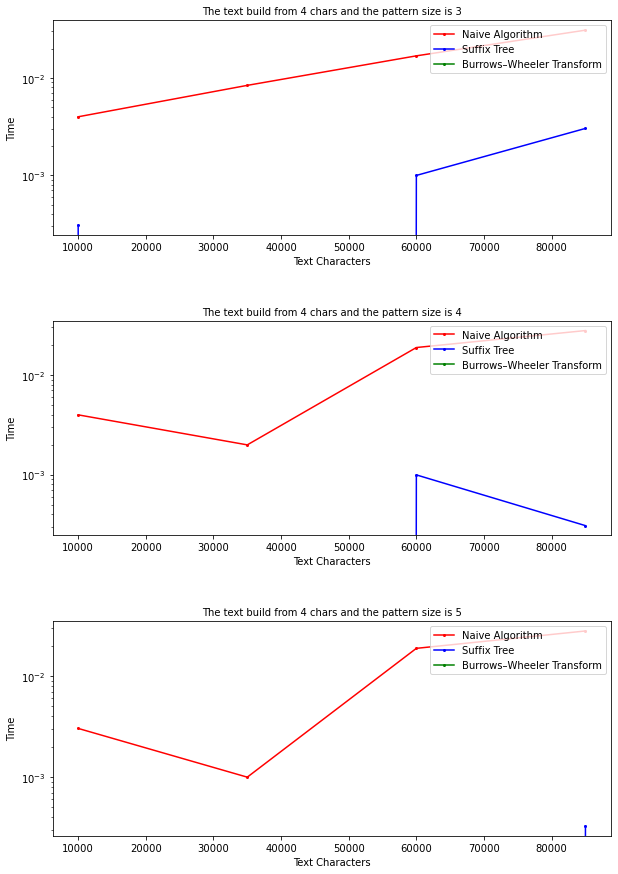

In [95]:
summary_results = []

fig = plt.figure(figsize=(10, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Load df to csv
df_plot = pd.read_csv('results_pattern_with_max_matches_genes_text_3_5.csv') 

i = 0
plot_num = len(df_plot["Pattern Characters"].unique())*len(df_plot["Num chars in text"].unique())

for pattr_chr in df_plot["Pattern Characters"].unique():
    for text_chr in df_plot["Num chars in text"].unique():
        arr_naive = []
        arr_st = []
        arr_bwt = []
        for alg in df_plot["Algorithm"].unique():   
            for text_len in df_plot["Text Characters"].unique():
                matches = df_plot[(df_plot["Algorithm"]==alg) & (df_plot["Text Characters"]==text_len) & (df_plot["Num chars in text"]==text_chr) & (df_plot["Pattern Characters"]==pattr_chr) & (df_plot["Construction"] == 0)]["Matches"].mean()
                Times = df_plot[(df_plot["Algorithm"]==alg) & (df_plot["Text Characters"]==text_len) & (df_plot["Num chars in text"]==text_chr) & (df_plot["Pattern Characters"]==pattr_chr) & (df_plot["Construction"] == 0)]["Time"].mean()
                summary_results.append([alg,matches,text_len,pattr_chr,0,Times,text_chr])
    
                if alg == "Naive Algorithm":
                    arr_naive.append([alg,matches,text_len,pattr_chr,0,Times,text_chr])
                elif alg == "Suffix Tree":
                    arr_st.append([alg,matches,text_len,pattr_chr,0,Times,text_chr])      
                elif alg == "Burrows–Wheeler Transform":
                    arr_bwt.append([alg,matches,text_len,pattr_chr,0,Times,text_chr]) 

        df_naive = pd.DataFrame(arr_naive, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Num chars in text'])
        df_st = pd.DataFrame(arr_st, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Num chars in text'])
        df_bwt = pd.DataFrame(arr_bwt, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Num chars in text'])

        i += 1
        ax = fig.add_subplot(plot_num, len(df_plot["Num chars in text"].unique()), i)
        ax.plot([10000,35000,60000,85000], df_naive['Time'], '-ok', markersize=2, color='r', label="Naive Algorithm") 
        ax.plot([10000,35000,60000,85000], df_st['Time'], '-ok', markersize=2, color='b', label="Suffix Tree")  
        ax.plot([10000,35000,60000,85000], df_bwt['Time'], '-ok', markersize=2, color='g', label="Burrows–Wheeler Transform") 
        ax.set_xlabel('Text Characters', fontsize=10)
        ax.set_ylabel('Time', fontsize=10) 
        ax.set_yscale('log')
        title_plot = "The text build from " + str(text_chr) + " chars and the pattern size is " + str(pattr_chr) 
        ax.set_title(title_plot, fontsize=10) 
        ax.legend(loc='upper right')

# df_avg = pd.DataFrame(summary_results, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Num chars in text'])

<b>* It can be seen from the suffix tree results that the higher is our pattern size,<br>
such wider the suffix tree and we'll get a faster search results.</b>


-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------

### Data Synthesis:

In [87]:
def create_random_text(str_size,alphabet,random_seed):
    alphabet=list(alphabet)
    l=len(alphabet)
    np.random.seed(random_seed)
    rand=np.random.randint(l,size=str_size)
    text = [alphabet[i] for i in rand]
    return  ''.join(text)

def get_random_sub_string_from_text(text,sub_str_size,random_seed):
    l=len(text)
    text=list(text)
    np.random.seed(random_seed)
    rand = int(np.random.randint(l-sub_str_size, size=1))
    return(text[rand:rand+sub_str_size])

arr_match_idx = []

def naive_algorithm_with_arr_idx(T,p):
    global arr_match_idx
    n = len(T)
    m = len(p)
    num_match = 0
    T += '$'
    for i in range(n):
        for j in range(m):
            if (T[i+j] != p[j]):
                j=0
                break
            elif (i+j >= n-1):
                break
        if (j == (m - 1)):
            arr_match_idx.append(i)
            num_match = num_match + 1
    return num_match 

# text is the input text
# match is the pattern, for example "AGC"
# req_num_matches how much times this "AGC" match is in the output text
def fix_text_to_constant_matches(text,match,req_num_matches):
    # what is the actual index position of the matches in the text
    global arr_match_idx
    
    length_match = 0
    while ((length_match - req_num_matches) != 0):
        arr_match_idx = []

        # naive algorithm with a small change of append to list
        naive_algorithm_with_arr_idx(text,match)
        length_match = len(arr_match_idx)
        text_changed = list(text)

        # drop matches in case of there are more than required
        if length_match > req_num_matches:
            np.random.shuffle(arr_match_idx)
            for i in range(length_match - req_num_matches):
                text_changed[arr_match_idx[i]] = str("T")
                
        # add matches in case of not enough in text
        if length_match < req_num_matches:
            for i in range(req_num_matches - length_match):
                loc_match = np.random.randint(len(text) - len(match) - 1, size=1)[0]
                for j in range(len(match)):
                    index_loc = loc_match + j
                    text_changed[index_loc] = match[j]

        text = ''.join(text_changed)
    
    return text



----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

### <b>Analyze Different Texts And Patterns</b><br>
<img src="required.png" alt="required from the lecturer" width="200" height="100" style="float:right">
Analyze results of text in different lengths: 10K to 100K in 10K intervals on a text consisting of: 4, 26, 52 characters.
The patterns consists of a length of 5, 50, 500, 5000. <br>
The goal is to get a clear picture about the capabilities of each algorithm and relative advantages over each other.

In [158]:
summary_results = []
SuffixTree_Construction = None
Burrows_Wheeler_FM_Construction = []
Burrows_Wheeler_Offset_Construction = 0

for run_idx in range(1, 11):
    print("\n\033[1mRunning Number:",run_idx,"\n-------------------------------------------------------------\033[0m\n")
    # characters in the text
    num_chars_text = ["CGAT", "ABCDEFGHIJKLMNOPQRSTUVWXYZ", "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"]
    # text sizes
    txt_size = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

    Text_Test = []
    for num_chars_text_idx in range(len(num_chars_text)):
        for txt_size_idx in range(len(txt_size)):
            Text_Test.append(create_random_text(txt_size[txt_size_idx],num_chars_text[num_chars_text_idx],40))

    prn = [5, 50, 500, 5000]
    for Text_Test_idx in range(len(Text_Test)):
        # build the construction for the specify text
        compare_algorithms(2,Text_Test[Text_Test_idx],"AGC",1)
        compare_algorithms(3,Text_Test[Text_Test_idx],"AGC",1)   
        prn_chars = ""
        for prn_idx in range(len(prn)):  
            start_idx = random.randint(0,len(Text_Test[Text_Test_idx])-prn[prn_idx])
            prn_chars = Text_Test[Text_Test_idx][start_idx:start_idx+prn[prn_idx]]

            # pattern with n characters
            compare_algorithms(1,Text_Test[Text_Test_idx],prn_chars,0)
            compare_algorithms(2,Text_Test[Text_Test_idx],prn_chars,0)
            compare_algorithms(3,Text_Test[Text_Test_idx],prn_chars,0) 

    df = pd.DataFrame(summary_results, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Text Chars']) 

csv_file = "results_graph_addition.csv"
# Save df to csv
df.to_csv(csv_file, index=False)



Running Number: 1 
-------------------------------------------------------------

Found 171 results for Suffix Tree There are 10000 characters in the text and 3 characters in the pattern
Found 171 results for Burrows–Wheeler Transform There are 10000 characters in the text and 3 characters in the pattern
Found 15 results for Naive Algorithm There are 10000 characters in the text and 5 characters in the pattern
Found 15 results for Suffix Tree There are 10000 characters in the text and 5 characters in the pattern
Found 15 results for Burrows–Wheeler Transform There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 10000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 10000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 10000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorit

Found 1098 results for Suffix Tree There are 70000 characters in the text and 3 characters in the pattern
Found 1098 results for Burrows–Wheeler Transform There are 70000 characters in the text and 3 characters in the pattern
Found 68 results for Naive Algorithm There are 70000 characters in the text and 5 characters in the pattern
Found 68 results for Suffix Tree There are 70000 characters in the text and 5 characters in the pattern
Found 68 results for Burrows–Wheeler Transform There are 70000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 500 characters in the pattern
Found

Found 3 results for Suffix Tree There are 30000 characters in the text and 3 characters in the pattern
Found 3 results for Burrows–Wheeler Transform There are 30000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 500 characters in the pattern
Found 1 result

Found 9 results for Suffix Tree There are 90000 characters in the text and 3 characters in the pattern
Found 9 results for Burrows–Wheeler Transform There are 90000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Suffix Tree There are 50000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Naive Algorithm There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5000 characters in the pattern

Running Number: 2 
-------------------------------------------------------------

Found 171 results for Suffix Tree There are 10000 characters in the text and 3 characters in the pattern
Found 171 results for Burrows–Wheeler Transform There are 10000 characters in the text and 3 characters in the pattern
Found 12 results for Naive Algorithm There are 10000 characters in the text and 5 characters in the pattern
Found 12 results for Suffix Tree There are 10000 characters in the text and 5 characters in the pattern
Found 12 results for Burrows–Wheeler Transform There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Naiv

Found 951 results for Suffix Tree There are 60000 characters in the text and 3 characters in the pattern
Found 951 results for Burrows–Wheeler Transform There are 60000 characters in the text and 3 characters in the pattern
Found 51 results for Naive Algorithm There are 60000 characters in the text and 5 characters in the pattern
Found 51 results for Suffix Tree There are 60000 characters in the text and 5 characters in the pattern
Found 51 results for Burrows–Wheeler Transform There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 500 characters in the pattern
Found 1

Found 3 results for Suffix Tree There are 20000 characters in the text and 3 characters in the pattern
Found 3 results for Burrows–Wheeler Transform There are 20000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 500 characters in the pattern
Found 1 result

Found 8 results for Suffix Tree There are 80000 characters in the text and 3 characters in the pattern
Found 8 results for Burrows–Wheeler Transform There are 80000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Suffix Tree There are 40000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Naive Algorithm There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5000 characters in the pattern
Found 2 results for Suffix Tree There are 100000 characters in the text and 3 characters in the pattern
Found 2 results for Burrows–Wheeler Transform There are 100000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 50 characters in the pattern
Fou

Found 783 results for Suffix Tree There are 50000 characters in the text and 3 characters in the pattern
Found 783 results for Burrows–Wheeler Transform There are 50000 characters in the text and 3 characters in the pattern
Found 49 results for Naive Algorithm There are 50000 characters in the text and 5 characters in the pattern
Found 49 results for Suffix Tree There are 50000 characters in the text and 5 characters in the pattern
Found 49 results for Burrows–Wheeler Transform There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 500 characters in the pattern
Found 1

Found 1 results for Naive Algorithm There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 10000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 10000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 10000 characters in the text and 50 characters in the pattern
Found 

Found 7 results for Suffix Tree There are 70000 characters in the text and 3 characters in the pattern
Found 7 results for Burrows–Wheeler Transform There are 70000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 70000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 500 characters in the pattern
Found 1 result

Found 0 results for Suffix Tree There are 30000 characters in the text and 3 characters in the pattern
Found 0 results for Burrows–Wheeler Transform There are 30000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 50 characters in the pattern
Fou

Found 783 results for Suffix Tree There are 50000 characters in the text and 3 characters in the pattern
Found 783 results for Burrows–Wheeler Transform There are 50000 characters in the text and 3 characters in the pattern
Found 55 results for Naive Algorithm There are 50000 characters in the text and 5 characters in the pattern
Found 55 results for Suffix Tree There are 50000 characters in the text and 5 characters in the pattern
Found 55 results for Burrows–Wheeler Transform There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 500 characters in the pattern
Found 1

Found 1 results for Naive Algorithm There are 100000 characters in the text and 500 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 500 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 500 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 10000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 10000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 10000 characters in the text and 5 characters in the patter

Found 4 results for Suffix Tree There are 60000 characters in the text and 3 characters in the pattern
Found 4 results for Burrows–Wheeler Transform There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 500 characters in the pattern
Found 1 result

Found 0 results for Suffix Tree There are 20000 characters in the text and 3 characters in the pattern
Found 0 results for Burrows–Wheeler Transform There are 20000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Suffix Tree There are 80000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 500 characters in the pattern
Found 1 result

Found 642 results for Suffix Tree There are 40000 characters in the text and 3 characters in the pattern
Found 642 results for Burrows–Wheeler Transform There are 40000 characters in the text and 3 characters in the pattern
Found 43 results for Naive Algorithm There are 40000 characters in the text and 5 characters in the pattern
Found 43 results for Suffix Tree There are 40000 characters in the text and 5 characters in the pattern
Found 43 results for Burrows–Wheeler Transform There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 500 characters in the pattern
Found 1

Found 1 results for Naive Algorithm There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5000 characters in the pattern
Found 1552 results for Suffix Tree There are 100000 characters in the text and 3 characters in the pattern
Found 1552 results for Burrows–Wheeler Transform There are 100000 characters in the text and 3 characters in the pattern
Found 103 results for Naive Algorithm There are 100000 characters in the text and 5 characters in the pattern
Found 103 results for Suffix Tree There are 100000 characters in the text and 5 characters in the pattern
Found 103 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 50 characters in the

Found 4 results for Burrows–Wheeler Transform There are 50000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 500 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 500 characters in the pattern
Found 1 resu

Found 1 results for Naive Algorithm There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5000 characters in the pattern
Found 0 results for Suffix Tree There are 10000 characters in the text and 3 characters in the pattern
Found 0 results for Burrows–Wheeler Transform There are 10000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 10000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 10000 characters in the text and 50 characters in the pattern
Found 

Found 1 results for Suffix Tree There are 70000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 70000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 500 characters in the pattern
Found 1 result

Found 481 results for Suffix Tree There are 30000 characters in the text and 3 characters in the pattern
Found 481 results for Burrows–Wheeler Transform There are 30000 characters in the text and 3 characters in the pattern
Found 29 results for Naive Algorithm There are 30000 characters in the text and 5 characters in the pattern
Found 29 results for Suffix Tree There are 30000 characters in the text and 5 characters in the pattern
Found 29 results for Burrows–Wheeler Transform There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 500 characters in the pattern
Found 1

Found 1 results for Naive Algorithm There are 80000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 5000 characters in the pattern
Found 1405 results for Suffix Tree There are 90000 characters in the text and 3 characters in the pattern
Found 1405 results for Burrows–Wheeler Transform There are 90000 characters in the text and 3 characters in the pattern
Found 86 results for Naive Algorithm There are 90000 characters in the text and 5 characters in the pattern
Found 86 results for Suffix Tree There are 90000 characters in the text and 5 characters in the pattern
Found 86 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 50 characters in the pattern


Found 3 results for Burrows–Wheeler Transform There are 40000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 500 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 500 characters in the pattern
Found 1 resu

Found 1 results for Naive Algorithm There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5000 characters in the pattern
Found 9 results for Suffix Tree There are 100000 characters in the text and 3 characters in the pattern
Found 9 results for Burrows–Wheeler Transform There are 100000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 50 characters in the pattern
Fou

Found 1 results for Suffix Tree There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 500 characters in the pattern
Found 1 result

Found 339 results for Suffix Tree There are 20000 characters in the text and 3 characters in the pattern
Found 339 results for Burrows–Wheeler Transform There are 20000 characters in the text and 3 characters in the pattern
Found 16 results for Naive Algorithm There are 20000 characters in the text and 5 characters in the pattern
Found 16 results for Suffix Tree There are 20000 characters in the text and 5 characters in the pattern
Found 16 results for Burrows–Wheeler Transform There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 500 characters in the pattern
Found 1

Found 1265 results for Suffix Tree There are 80000 characters in the text and 3 characters in the pattern
Found 1265 results for Burrows–Wheeler Transform There are 80000 characters in the text and 3 characters in the pattern
Found 78 results for Naive Algorithm There are 80000 characters in the text and 5 characters in the pattern
Found 78 results for Suffix Tree There are 80000 characters in the text and 5 characters in the pattern
Found 78 results for Burrows–Wheeler Transform There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 500 characters in the pattern
Found

Found 3 results for Suffix Tree There are 40000 characters in the text and 3 characters in the pattern
Found 3 results for Burrows–Wheeler Transform There are 40000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5000 characters in the pattern
Found 9 results for Suffix Tree There are 100000 characters in the text and 3 characters in the pattern
Found 9 results for Burrows–Wheeler Transform There are 100000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 50 characters in the pat

Found 1 results for Suffix Tree There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 500 characters in the pattern
Found 1 result

Found 339 results for Suffix Tree There are 20000 characters in the text and 3 characters in the pattern
Found 339 results for Burrows–Wheeler Transform There are 20000 characters in the text and 3 characters in the pattern
Found 25 results for Naive Algorithm There are 20000 characters in the text and 5 characters in the pattern
Found 25 results for Suffix Tree There are 20000 characters in the text and 5 characters in the pattern
Found 25 results for Burrows–Wheeler Transform There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 500 characters in the pattern
Found 1

Found 1265 results for Suffix Tree There are 80000 characters in the text and 3 characters in the pattern
Found 1265 results for Burrows–Wheeler Transform There are 80000 characters in the text and 3 characters in the pattern
Found 85 results for Naive Algorithm There are 80000 characters in the text and 5 characters in the pattern
Found 85 results for Suffix Tree There are 80000 characters in the text and 5 characters in the pattern
Found 85 results for Burrows–Wheeler Transform There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 500 characters in the pattern
Found

Found 3 results for Suffix Tree There are 40000 characters in the text and 3 characters in the pattern
Found 3 results for Burrows–Wheeler Transform There are 40000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Naive Algorithm There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5000 characters in the pattern
Found 9 results for Suffix Tree There are 100000 characters in the text and 3 characters in the pattern
Found 9 results for Burrows–Wheeler Transform There are 100000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 50 characters in the pattern
Fou

Found 1 results for Suffix Tree There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 500 characters in the pattern
Found 1 result

Found 339 results for Suffix Tree There are 20000 characters in the text and 3 characters in the pattern
Found 339 results for Burrows–Wheeler Transform There are 20000 characters in the text and 3 characters in the pattern
Found 25 results for Naive Algorithm There are 20000 characters in the text and 5 characters in the pattern
Found 25 results for Suffix Tree There are 20000 characters in the text and 5 characters in the pattern
Found 25 results for Burrows–Wheeler Transform There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 500 characters in the pattern
Found 1

Found 1265 results for Suffix Tree There are 80000 characters in the text and 3 characters in the pattern
Found 1265 results for Burrows–Wheeler Transform There are 80000 characters in the text and 3 characters in the pattern
Found 63 results for Naive Algorithm There are 80000 characters in the text and 5 characters in the pattern
Found 63 results for Suffix Tree There are 80000 characters in the text and 5 characters in the pattern
Found 63 results for Burrows–Wheeler Transform There are 80000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 80000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 80000 characters in the text and 500 characters in the pattern
Found

Found 3 results for Suffix Tree There are 40000 characters in the text and 3 characters in the pattern
Found 3 results for Burrows–Wheeler Transform There are 40000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 40000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 40000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Naive Algorithm There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5000 characters in the pattern
Found 9 results for Suffix Tree There are 100000 characters in the text and 3 characters in the pattern
Found 9 results for Burrows–Wheeler Transform There are 100000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 50 characters in the pattern
Fou

Found 1 results for Suffix Tree There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 60000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 60000 characters in the text and 500 characters in the pattern
Found 1 result

Found 339 results for Suffix Tree There are 20000 characters in the text and 3 characters in the pattern
Found 339 results for Burrows–Wheeler Transform There are 20000 characters in the text and 3 characters in the pattern
Found 17 results for Naive Algorithm There are 20000 characters in the text and 5 characters in the pattern
Found 17 results for Suffix Tree There are 20000 characters in the text and 5 characters in the pattern
Found 17 results for Burrows–Wheeler Transform There are 20000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 20000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 20000 characters in the text and 500 characters in the pattern
Found 1

Found 1 results for Suffix Tree There are 70000 characters in the text and 500 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 500 characters in the pattern
Found 1 results for Naive Algorithm There are 70000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 70000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 70000 characters in the text and 5000 characters in the pattern
Found 1265 results for Suffix Tree There are 80000 characters in the text and 3 characters in the pattern
Found 1265 results for Burrows–Wheeler Transform There are 80000 characters in the text and 3 characters in the pattern
Found 94 results for Naive Algorithm There are 80000 characters in the text and 5 characters in the pattern
Found 94 results for Suffix Tree There are 80000 characters in the text and 5 characters in the pattern
Fo

Found 3 results for Suffix Tree There are 30000 characters in the text and 3 characters in the pattern
Found 3 results for Burrows–Wheeler Transform There are 30000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 30000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 30000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 30000 characters in the text and 500 characters in the pattern
Found 1 result

Found 9 results for Suffix Tree There are 90000 characters in the text and 3 characters in the pattern
Found 9 results for Burrows–Wheeler Transform There are 90000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 90000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 90000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Suffix Tree There are 50000 characters in the text and 3 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 3 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 5 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Suffix Tree There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 50000 characters in the text and 50 characters in the pattern
Found 1 results for Naive Algorithm There are 50000 characters in the text and 500 characters in the pattern
Found 1 result

Found 1 results for Naive Algorithm There are 100000 characters in the text and 500 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 500 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 500 characters in the pattern
Found 1 results for Naive Algorithm There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 5000 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 5000 characters in the pattern


In [160]:
df_10_samples

,Algorithm,Matches,Text Characters,Pattern Characters,Construction,Time,Text Chars
0,Suffix Tree,171,10000,3,1,14.588015,4
1,Burrows–Wheeler Transform,171,10000,3,1,0.112698,4
2,Naive Algorithm,15,10000,5,0,0.004025,4
3,Suffix Tree,15,10000,5,0,0.000000,4
4,Burrows–Wheeler Transform,15,10000,5,0,0.000000,4
5,Naive Algorithm,1,10000,50,0,0.004003,4
6,Suffix Tree,1,10000,50,0,0.000000,4
7,Burrows–Wheeler Transform,1,10000,50,0,0.000000,4
8,Naive Algorithm,1,10000,500,0,0.004992,4
9,Suffix Tree,1,10000,500,0,0.000000,4


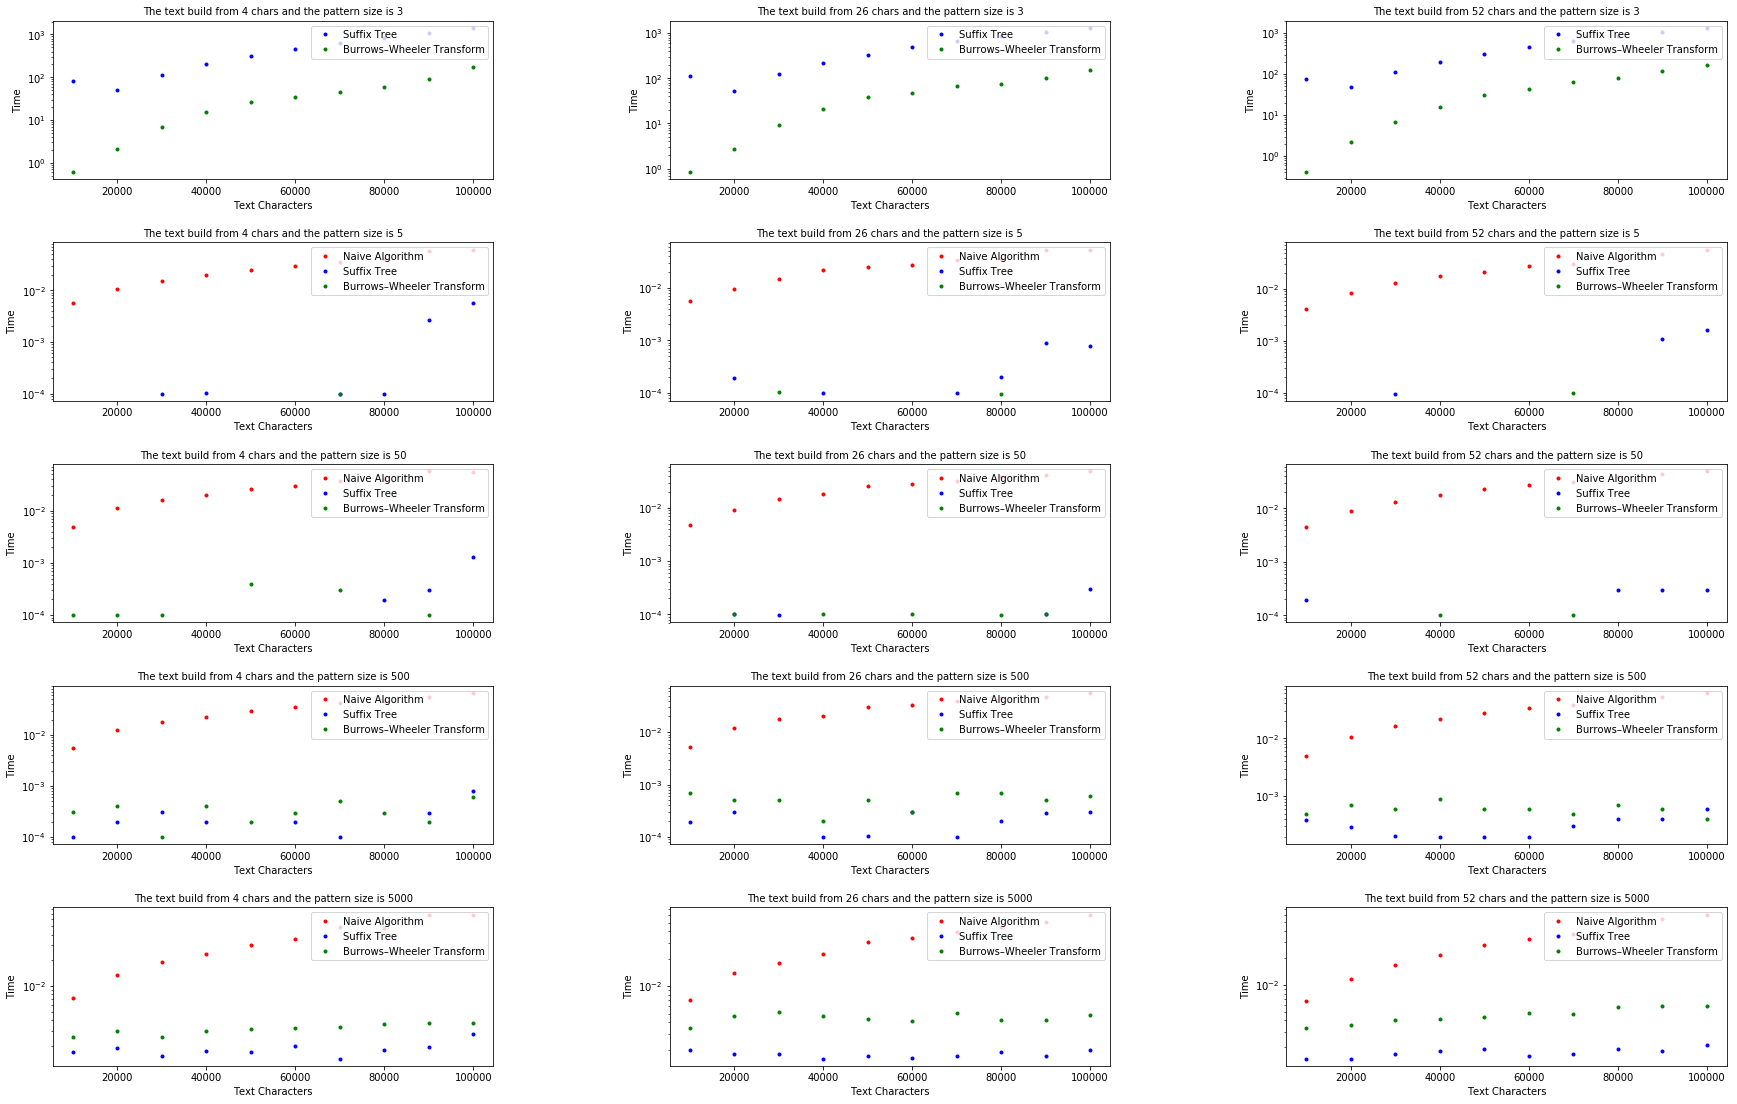

In [12]:
summary_results = []

fig = plt.figure(figsize=(30, 15*4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Load df to csv
df_10_samples = pd.read_csv('results_graph_addition.csv') 

i = 0
plot_num = len(df_10_samples["Pattern Characters"].unique())*len(df_10_samples["Text Chars"].unique())

for pattr_chr in df_10_samples["Pattern Characters"].unique():
    for text_chr in df_10_samples["Text Chars"].unique():
        arr_naive = []
        arr_st = []
        arr_bwt = []
        for alg in df_10_samples["Algorithm"].unique():   
            for text_len in df_10_samples["Text Characters"].unique():
                matches = df_10_samples[(df_10_samples["Algorithm"]==alg) & (df_10_samples["Text Characters"]==text_len) & (df_10_samples["Text Chars"]==text_chr) & (df_10_samples["Pattern Characters"]==pattr_chr)]["Matches"].mean()
                Times = df_10_samples[(df_10_samples["Algorithm"]==alg) & (df_10_samples["Text Characters"]==text_len) & (df_10_samples["Text Chars"]==text_chr) & (df_10_samples["Pattern Characters"]==pattr_chr)]["Time"].mean()
                summary_results.append([alg,matches,text_len,pattr_chr,0,Times,text_chr])
    
                if alg == "Naive Algorithm":
                    arr_naive.append([alg,matches,text_len,pattr_chr,0,Times,text_chr])
                elif alg == "Suffix Tree":
                    arr_st.append([alg,matches,text_len,pattr_chr,0,Times,text_chr])      
                elif alg == "Burrows–Wheeler Transform":
                    arr_bwt.append([alg,matches,text_len,pattr_chr,0,Times,text_chr]) 
      
        if (len(arr_naive) == 10):

            df_naive = pd.DataFrame(arr_naive, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Text Chars'])
            df_st = pd.DataFrame(arr_st, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Text Chars'])
            df_bwt = pd.DataFrame(arr_bwt, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Text Chars'])
            
            i += 1
            ax = fig.add_subplot(plot_num, len(df_10_samples["Text Chars"].unique()), i)
            if (pattr_chr != 3):
                ax.plot(np.arange(10000,110000,10000), df_naive['Time'], 'o', markersize=3, color='r', label="Naive Algorithm") 
            ax.plot(np.arange(10000,110000,10000), df_st['Time'], 'o', markersize=3, color='b', label="Suffix Tree")  
            ax.plot(np.arange(10000,110000,10000), df_bwt['Time'], 'o', markersize=3, color='g', label="Burrows–Wheeler Transform") 
            ax.set_xlabel('Text Characters', fontsize=10)
            ax.set_ylabel('Time', fontsize=10) 
            ax.set_yscale('log')
            title_plot = "The text build from " + str(text_chr) + " chars and the pattern size is " + str(pattr_chr) 
            ax.set_title(title_plot, fontsize=10) 
            ax.legend(loc='upper right')

df_avg = pd.DataFrame(summary_results, columns = ['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time','Text Chars'])

### Examine the significance of the differences between suffix tree and BWT in points A and B:

In [40]:
from scipy import stats

print("Lets check if the differnce in the two points (A and B) are significance:")

Point_A_4_5000_data = df_10_samples[(df_10_samples["Text Characters"]==100000) & (df_10_samples["Pattern Characters"]==5000) & (df_10_samples["Construction"]==0) & (df_10_samples["Text Chars"]==4)]
Point_A_4_5000_data_diff = Point_A_4_5000_data[Point_A_4_5000_data["Algorithm"]=="Burrows–Wheeler Transform"].Time.values - Point_A_4_5000_data[Point_A_4_5000_data["Algorithm"]=="Suffix Tree"].Time.values

Point_B_52_5000_data = df_10_samples[(df_10_samples["Text Characters"]==100000) & (df_10_samples["Pattern Characters"]==5000) & (df_10_samples["Construction"]==0) & (df_10_samples["Text Chars"]==52)]
Point_B_52_5000_data_diff = Point_B_52_5000_data[Point_B_52_5000_data["Algorithm"]=="Burrows–Wheeler Transform"].Time.values - Point_B_52_5000_data[Point_B_52_5000_data["Algorithm"]=="Suffix Tree"].Time.values

t, p_value = stats.ttest_ind(Point_A_4_5000_data_diff,Point_B_52_5000_data_diff)
print("t = " + str(t),", p_value = " + str(p_value))

if (p_value < 0.05):
    print("\033[1mThe result is statistical significant\033[0m")
else:
    print("\033[1mThe result is not statistical significant\033[0m")

Lets check if the differnce in the two points (A and B) are significance:
t = -4.655257583024032 , p_value = 0.00019684559788163238
The result is statistical significance


### GENS (with the same number of matches)
We will examine the meaning of the same MATCHES in each of the algorithms:<br>
In the suffix tree it is known that the number of leaves is the same in each of the runs but there can be different sizes of nodes, so the running time is expected to be the same until the point of changing the number of nodes holding the leaves.<br>
In BWT it is clear that the results will be immediate because the pattern size is very short.<br>
In the naive solution that depends on the size of the text, we get a time that depends on the length of the text.

In [30]:
summary_results = []
SuffixTree_Construction = None
Burrows_Wheeler_FM_Construction = []
Burrows_Wheeler_Offset_Construction = 0

In [31]:
T_200_matches_p = []

for i in range(10):
    T_200_matches_p.append(fix_text_to_constant_matches(T[::(i+1)*100],"ACG",200))
    
    T_200_matches_p[i] = fix_text_to_constant_matches(T_200_matches_p[i],"AC",1)
    T_200_matches_p[i] = fix_text_to_constant_matches(T_200_matches_p[i],"ACG",1)
    T_200_matches_p[i] = fix_text_to_constant_matches(T_200_matches_p[i],"ACGG",1)
    T_200_matches_p[i] = fix_text_to_constant_matches(T_200_matches_p[i],"ACGGA",1)
    T_200_matches_p[i] = fix_text_to_constant_matches(T_200_matches_p[i],"ACGGAT",1)
    T_200_matches_p[i] = fix_text_to_constant_matches(T_200_matches_p[i],"ACGGATG",200)

In [1]:
for i in range(10):
    print("\n\033[1m\033[4mText:",(i+1)*100,"sampled:\033[0m")
    # sample every i characters
    compare_algorithms(1,T_200_matches_p[i],"ACG",1)
    compare_algorithms(2,T_200_matches_p[i],"ACG",1)
    compare_algorithms(3,T_200_matches_p[i],"ACG",1)
  
    # pattern with 2 characters
    compare_algorithms(1,T_200_matches_p[i],"AC",0)
    compare_algorithms(2,T_200_matches_p[i],"AC",0)
    compare_algorithms(3,T_200_matches_p[i],"AC",0)
    # pattern with 3 characters
    compare_algorithms(1,T_200_matches_p[i],"ACG",0)
    compare_algorithms(2,T_200_matches_p[i],"ACG",0)
    compare_algorithms(3,T_200_matches_p[i],"ACG",0)
    # pattern with 4 characters
    compare_algorithms(1,T_200_matches_p[i],"ACGG",0)
    compare_algorithms(2,T_200_matches_p[i],"ACGG",0)
    compare_algorithms(3,T_200_matches_p[i],"ACGG",0)
    # pattern with 5 characters
    compare_algorithms(1,T_200_matches_p[i],"ACGGA",0)
    compare_algorithms(2,T_200_matches_p[i],"ACGGA",0)
    compare_algorithms(3,T_200_matches_p[i],"ACGGA",0)
    # pattern with 6 characters
    compare_algorithms(1,T_200_matches_p[i],"ACGGAT",0)
    compare_algorithms(2,T_200_matches_p[i],"ACGGAT",0)
    compare_algorithms(3,T_200_matches_p[i],"ACGGAT",0)
    # pattern with 7 characters
    compare_algorithms(1,T_200_matches_p[i],"ACGGATG",0)
    compare_algorithms(2,T_200_matches_p[i],"ACGGATG",0)
    compare_algorithms(3,T_200_matches_p[i],"ACGGATG",0)
    

In [ ]:
df = pd.DataFrame(summary_results, columns =['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time[s]']) 
df

In [ ]:
# Save df to csv
df.to_csv('results_200.csv',index=False)

In [ ]:
# Load df to csv
# df = pd.read_csv('results_200.csv')  

In [ ]:
df = df[df["Matches"] != 0]
df_text = df[(df["Construction"]==1) & (df["Algorithm"]=="Naive Algorithm")]["Text Characters"].values

df_constr_naive = df[(df["Construction"]==1) & (df["Algorithm"]=="Naive Algorithm")]["Time[s]"].values
df_constr_st = df[(df["Construction"]==1) & (df["Algorithm"]=="Suffix Tree")]["Time[s]"].values
df_constr_bwt = df[(df["Construction"]==1) & (df["Algorithm"]=="Burrows–Wheeler Transform")]["Time[s]"].values

df_pattern_naive, df_pattern_st, df_pattern_bwt = [], [], []
for i in range(2,8):
    df_pattern_naive.append(df[(df["Construction"]==0) & (df["Algorithm"]=="Naive Algorithm") & (df["Pattern Characters"]==i)]["Time[s]"].values)
    df_pattern_st.append(df[(df["Construction"]==0) & (df["Algorithm"]=="Suffix Tree") & (df["Pattern Characters"]==i)]["Time[s]"].values)
    df_pattern_bwt.append(df[(df["Construction"]==0) & (df["Algorithm"]=="Burrows–Wheeler Transform") & (df["Pattern Characters"]==i)]["Time[s]"].values)

In [ ]:
plt.plot(df_text, df_constr_naive, 'r', label="Naive Algorithm") 
plt.plot(df_text, df_constr_st, 'b', label="Suffix Tree")  
plt.plot(df_text, df_constr_bwt, 'g', label="Burrows–Wheeler Transform") 
plt.xlabel('Time[s]', fontsize=10)
plt.ylabel('Text Characters', fontsize=10) 
plt.title('Algorithms in construction', fontsize=10) 
plt.legend(loc='best')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2, 7):
    ax = fig.add_subplot(2, 3, i-1)
    ax.plot(df_text, df_pattern_naive[i-1], '-ok', markersize=2, color='r', label="Naive Algorithm") 
    ax.plot(df_text, df_pattern_st[i-1], '-ok', markersize=2, color='b', label="Suffix Tree")  
    ax.plot(df_text, df_pattern_bwt[i-1], '-ok', markersize=2, color='g', label="Burrows–Wheeler Transform") 
    ax.set_xlabel('Text Characters', fontsize=10)
    ax.set_ylabel('Time', fontsize=10) 
    title = "Pattern Characters = {:.2f}".format(i+1)
    ax.set_title(title)
    ax.legend()   

### Suffix Tree Vs BWT
In case a pattern starts with a letter that appears once in the text (eg 'A'), the tree will be found immediately while BWT will perform a large number of calculations that are relative to the length of the pattern.

In [1]:
text_string = create_random_text(100000,"abcdefghijklmnopqrstuvwxyzBCDEFGHIJKLMNOPQRSTUVWXYZ123456789",40)
text_string = list(text_string)
text_string[500] = "A"
text_string = ''.join(text_string)
# text_string

In [215]:
p = "AQEO4UQpIl..."

In [217]:
summary_results = []
SuffixTree_Construction = None
Burrows_Wheeler_FM_Construction = []
Burrows_Wheeler_Offset_Construction = 0

In [226]:
# sample every i characters
compare_algorithms(1,text_string,"VzfYkLuj2XzH",1)
compare_algorithms(2,text_string,"VzfYkLuj2XzH",1)
compare_algorithms(3,text_string,"VzfYkLuj2XzH",1)

# pattern with 3 characters
compare_algorithms(1,text_string,p,0)
compare_algorithms(2,text_string,p,0)
compare_algorithms(3,text_string,p,0)
    

Found 1 results for Naive Algorithm There are 100000 characters in the text and 62423 characters in the pattern
Found 1 results for Suffix Tree There are 100000 characters in the text and 62423 characters in the pattern
Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 62423 characters in the pattern


In [241]:
df = pd.DataFrame(summary_results, columns =['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time[s]']) 
df

,Algorithm,Matches,Text Characters,Pattern Characters,Construction,Time[s]
1,Naive Algorithm,1,100000,12,1,0.046860
2,Suffix Tree,1,100000,12,1,1287.551602
3,Burrows–Wheeler Transform,1,100000,12,1,163.019664
7,Naive Algorithm,1,100000,62423,0,0.070817
8,Suffix Tree,1,100000,62423,0,0.024953
9,Burrows–Wheeler Transform,1,100000,62423,0,0.065842


In [242]:
# Save df to csv
df.to_csv('results_string_max_pattern.csv',index=False)

### Worst Case
#### BWT:
The worst case for the BWT is the length of the pattern is the same length as the whole text.

In [251]:
p = text_string
compare_algorithms(3,text_string,p,0)
df = pd.DataFrame(summary_results, columns =['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time[s]']) 
df.iloc[-1]

Found 1 results for Burrows–Wheeler Transform There are 100000 characters in the text and 100000 characters in the pattern


Algorithm             Burrows–Wheeler Transform
Matches                                       1
Text Characters                          100000
Pattern Characters                       100000
Construction                                  0
Time[s]                               0.0978088
Name: 18, dtype: object

The naive solution is faster than the solution of BWT,<br>
That means all the construction of the BWT is unnecessary.

#### Suffix Tree:
The worst case for the suffix tree is the text has only one charcter in the whole text,<br> 
means all the text is with "a" character only and searching for a pattern of "aaa".

In [19]:
text_string = create_random_text(1000,"a",40)

summary_results = []
SuffixTree_Construction = None
Burrows_Wheeler_FM_Construction = []
Burrows_Wheeler_Offset_Construction = 0

p = "aaa"

# sample every i characters
compare_algorithms(1,text_string,"a",1)
compare_algorithms(2,text_string,"a",1)
compare_algorithms(3,text_string,"a",1)

# pattern with 3 characters
compare_algorithms(1,text_string,p,0)
compare_algorithms(2,text_string,p,0)
compare_algorithms(3,text_string,p,0)

Found 1000 results for Naive Algorithm There are 1000 characters in the text and 1 characters in the pattern
Found 1000 results for Suffix Tree There are 1000 characters in the text and 1 characters in the pattern
Found 1000 results for Burrows–Wheeler Transform There are 1000 characters in the text and 1 characters in the pattern
Found 998 results for Naive Algorithm There are 1000 characters in the text and 3 characters in the pattern
Found 998 results for Suffix Tree There are 1000 characters in the text and 3 characters in the pattern
Found 998 results for Burrows–Wheeler Transform There are 1000 characters in the text and 3 characters in the pattern


In [20]:
df = pd.DataFrame(summary_results, columns =['Algorithm', 'Matches','Text Characters','Pattern Characters','Construction','Time[s]']) 
df

,Algorithm,Matches,Text Characters,Pattern Characters,Construction,Time[s]
0,Naive Algorithm,1000,1000,1,1,0.001030
1,Suffix Tree,1000,1000,1,1,0.231350
2,Burrows–Wheeler Transform,1000,1000,1,1,0.002035
3,Naive Algorithm,998,1000,3,0,0.000994
4,Suffix Tree,998,1000,3,0,0.001000
5,Burrows–Wheeler Transform,998,1000,3,0,0.000000


The naive solution is faster than the solution of suffix tree, <br>
That is, all the construction of the tree is unnecessary.

# The End.